# Assignment 3: Image Classification using CNN

##Background
The effort so far has pretty much  been on understanding the classical machine learning algorithms and ofcourse, bringing them to life with some nicer and neater implementations. Give yourself a pat on the back......great job thus far! With your favourite story teller Prajwal Singh (kudos to him) taking a break from his story, we invite you to take a dive into some deep learning stuff. But don't worry, we assure you that he will be back with his story soon.<br> <br> We now move towards understanding and implementing the Convolutional Neural Networks (CNN). Just to give you a background, the advent of the idea of CNNs dates back to 1959, when David Hubel and Torsten Wiesel described “simple cells” and “complex cells” in the human visual cortex. They proposed in 1962 that complex cells achieve spatial invariance by “summing” the output of several simple cells that all prefer the same orientation but different receptive fields (e.g. bottom, middle, or top of an image). By collecting information from a bunch of simple cell minions, the complex cells can respond to horizontal bars that occur anywhere. This concept — that simple detectors can be “summed” to create more complex detectors — is found throughout the human visual system, and is also the fundamental basis of convolution neural network models. <br> <br> Inspired by this idea, networks like LENet and AlexNet were introduced to mark the foundation of modern convolutional neural networks. Ofcourse, after that we witnessed a plenty of new architectures (VGGNet, ResNet, etc), so many in number that the space will get flooded if we try to list them all down.

##Image Classification

Well...you know it already, but just for the sake of completeness - <i>Image classification is the task of assigning a label to an input image from a fixed set of classes.</i> For instance, in the following figure, an image classification model takes in an input image from a dataset and assigns a label to it from the given classes in the dataset. Clearly, that's what you will be doing!<br><br><br>




<img src='https://rishabhjain.xyz/ml-class-project/public/images/cat_mod.png' type='image'>


##Objective

Let's implement [VGG19](https://arxiv.org/pdf/1409.1556.pdf) and 
and [ResNet](https://arxiv.org/pdf/1512.03385.pdf) on the CIFAR10 dataset for image classification and also compare their performance with a simple n-layer feedforward neural network (as you must have done in the last assignment. However, we will do so under two experimental settings.

**Dataset**

We will again use the CIFAR-10 dataset. This dataset consists of 60,000 RGB images of size 32x32. The images belong to objects of 10 classes such as frogs, horses, ships, trucks etc. The dataset is divided into 50,000 training images and 10,000 testing images. Among the training images, we used 49,000 images for training and 1000 images for validation. <img src='https://rishabhjain.xyz/ml-class-project/public/images/cifar-10.png' type='image'>

**Experimental Settings**

* **Supervised Learning**: Since we have labels for all images, we will use supervised learning to solve this task. Here, we will use all 49,000 training samples with their labels for supervised learning. 

* **Semi-supervised Learning**: It comes handy when we have a dataset that is partially labelled or we want to use a pool of unlabeled data for training. To simulate this setting, we will split the CIFAR-10 training data into 2 parts, 5,000 images which have labels and the rest 44,000 images which are treated as unlabeled images. We shall use <i>self-training</i> as a wrapper on supervised learning technique for semi-supervised learning.


**What is Self Training?**

Self-Training is a technique which can be applied to any supervised learning algorithm to train it in a semi-supervised fashion. The algorithm first uses the labeled data to train the model. After training it for few iterations, some part of unlabled data is labeled using the trained model and is added to the set of labeled training data for the next iteration.

##Implementation Details

**Libraries**

This time we give you freedom to choose between [Pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and [Tensorflow](https://www.tensorflow.org/tutorials/images/cnn). Go through these links to get acquainted yourself with the frameworks and decide on your choice. Make sure you follow more or less the same format while coding in either of the two deep learning libraries. 

**Data Augmentation**

It is the process of preprocessing the data before feeding it to the model. It increases the diversity of the data which allows the model to generalize well and results in higher accuracy. We will primarily do the following three types of modification on the dataset.

* Random Crop: Add sufficient padding to the original image and then randomly crop to create a new image.
* Random Horizontal Flip: The original image is randomly flipped horizontally to produce new image.
* Resizing the Original Image: The original image will be resized to a different shape. Some deep neural networks require the image to be of sufficient size due to multiple down-sampling layers in the architecture.

**Hyperparameter Optimization**

The accuracy of any particular model depends on the careful selection of the optimizer and the parameters that optimizer depends on, such as learning rate, momentum for Stochastic Gradient Descent, weight decays, and batch size.

To find the optimum value of these hyperparameters, vary these hyperparameters over a certain range and track the accuracy of the model on the validation dataset.

For instance, the following figure shows the performance of a sample ResNet model with different learning rates for Adam optimizer. We can clearly see that model performs best at the learning rate of 0.001. Other learning rates are either too small or too large for the model to converge.

<img src='https://rishabhjain.xyz/ml-class-project/public/images/supervised_model_performance/learningRateTuning.svg' type='image'>


## Deliverables

* Perform image classifcation over CIFAR10 dataset using VGG19, ResNet18, and an n-layer MLP. Compare their performances by reporting the confusion matrices.

* Compare the model performance under the two settings (described above) and report your observations. Note: Do include the optimum values for the hyperparameters and show the plots (as above) justifying your choice.

* Include the training plots (Train loss vs Epochs) for each of the trained models.

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
import tensorflow.keras as keras
from keras import layers
from tensorflow import image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
AUTOTUNE = tf.data.AUTOTUNE
from keras.models import Model
from keras.layers import Input
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

# **Data Import**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
The data is normalize to bring value in range 0-1 and run model faster.
Labels are One-Hot Encoded

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train,Y_train=X_train[:10000], Y_train[:10000]
X_test,Y_test=X_test[:1000],Y_test[:1000]

# Normalize the data.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1,shuffle = True)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

In [ ]:
a_1=X_train[1]

# **Data Augmentation**

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

In [ ]:
def augment(image_label,seed):
  image = image_label
  image = tf.image.flip_left_right(image)

  new_seed = tf.random.experimental.stateless_split(seed,num=1)[0, :]
  
  image = tf.image.stateless_random_crop(image,size=[20,20,3],seed=(1,2))
  
  image = tf.image.pad_to_bounding_box(image,6,6,32,32)
  
  return image

In [ ]:
def augment_images(images, seed):
    new_images = np.zeros(images.shape)
    for i, image in enumerate(images):
        new_images[i] = augment(image, (i + seed * 100, 0))
    return new_images

In [ ]:
X_train = (augment_images(X_train, 123))

In [ ]:
a=X_train[1]

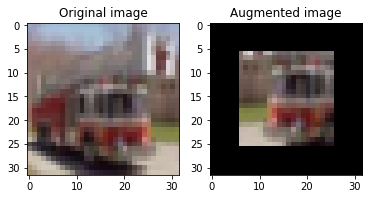

In [ ]:
visualize(a_1,a)

Above the data is augmented as:
It was first turn horizontally then it was randomly cropped into 20*20*3 shape and padded to original size 32*32*3

# **ResNet18**

In [ ]:
class ResNet18(Model):
  def __init__(self, num_classes, **kwargs):
    """num_classes: number of classes in specific classification task."""
    super().__init__(**kwargs)
    self.conv_1 = Conv2D(64, (7, 7), strides=2,padding="valid", kernel_initializer="he_normal")
    self.init_bn = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="valid")
    self.res_1_1 = ResnetBlock(64)
    self.res_1_2 = ResnetBlock(64)
    self.res_2_1 = ResnetBlock(128, down_sample=True)
    self.res_2_2 = ResnetBlock(128)
    self.res_3_1 = ResnetBlock(256, down_sample=True)
    self.res_3_2 = ResnetBlock(256)
    self.res_4_1 = ResnetBlock(512, down_sample=True)
    self.res_4_2 = ResnetBlock(512)
    self.avg_pool = GlobalAveragePooling2D()
    self.flat = Flatten()
    self.fc = Dense(num_classes, activation="softmax")

  def call(self, inputs):
    out = self.conv_1(inputs)
    out = self.init_bn(out)
    out = tf.nn.relu(out)
    out = self.pool_2(out)
    for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
        out = res_block(out)
    out = self.avg_pool(out)
    out = self.flat(out)
    out = self.fc(out)
    return out

In [ ]:
class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out

In [ ]:
class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
#print(history.history.keys())
#plotmodelhistory(history)


In [ ]:
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))
#categorical_crossentropy is use since the label is one-hot encoded
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) 
model.compile(optimizer =opt ,loss='categorical_crossentropy', metrics=["accuracy"]) 
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  9472      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  multiple          

In [ ]:
lr_r=[0.0001,0.001,0.01,0.1] #learning_rate
bs=[128,256,512]  #batch_size

In [ ]:
lr_r=[0.0001,0.001,0.01,0.1]
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")

STEPS = len(X_train) / 256

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/10
35/35 [==============================] - 15s 147ms/step - loss: 3.1228 - accuracy: 0.1296 - val_loss: 2.6033 - val_accuracy: 0.0730
Epoch 2/10
35/35 [==============================] - 6s 159ms/step - loss: 2.5508 - accuracy: 0.1872 - val_loss: 2.3991 - val_accuracy: 0.1040
Epoch 3/10
35/35 [==============================] - 5s 135ms/step - loss: 2.0960 - accuracy: 0.2860 - val_loss: 2.3529 - val_accuracy: 0.1230
Epoch 4/10
35/35 [==============================] - 5s 146ms/step - loss: 2.0523 - accuracy: 0.2960 - val_loss: 2.3591 - val_accuracy: 0.1310
Epoch 5/10
35/35 [==============================] - 7s 208ms/step - loss: 1.7686 - accuracy: 0.3793 - val_loss: 2.3770 - val_accuracy: 0.1370
Epoch 6/10
35/35 [==============================] - 5s 142ms/step - loss: 1.7497 - accuracy: 0.3863 - val_loss: 2.4157 - val_accuracy: 0.1330
Epoch 7/10
35/35 [==============================] - 5s 136ms/step - loss: 1.5568 - accuracy: 0.4601 - val_loss: 2.4898 - val_accuracy: 0.1410
Epoch

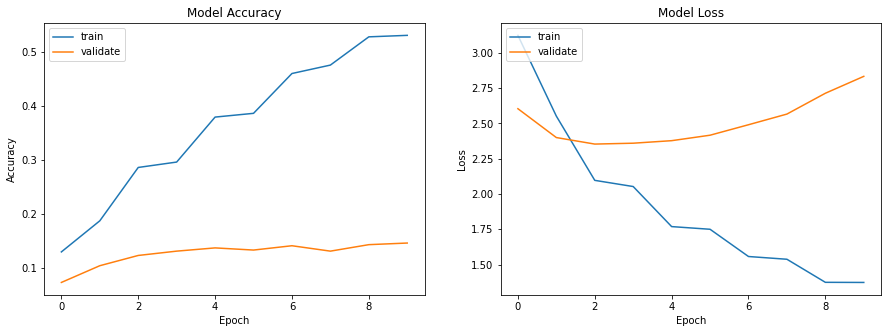

282/282 [==============================] - 14s 49ms/step - loss: 1.7124 - accuracy: 0.3884
Epoch 1/10
35/35 [==============================] - 8s 175ms/step - loss: 1.1766 - accuracy: 0.6251 - val_loss: 2.9471 - val_accuracy: 0.1570
Epoch 2/10
35/35 [==============================] - 6s 168ms/step - loss: 1.1054 - accuracy: 0.6578 - val_loss: 3.0298 - val_accuracy: 0.1490
Epoch 3/10
35/35 [==============================] - 10s 283ms/step - loss: 1.0358 - accuracy: 0.6934 - val_loss: 3.1431 - val_accuracy: 0.1600
Epoch 4/10
35/35 [==============================] - 6s 173ms/step - loss: 0.9775 - accuracy: 0.7158 - val_loss: 3.2137 - val_accuracy: 0.1520
Epoch 5/10
35/35 [==============================] - 5s 156ms/step - loss: 0.9204 - accuracy: 0.7470 - val_loss: 3.3223 - val_accuracy: 0.1470
Epoch 6/10
35/35 [==============================] - 5s 154ms/step - loss: 0.8685 - accuracy: 0.7710 - val_loss: 3.3657 - val_accuracy: 0.1550
Epoch 7/10
35/35 [==============================] - 6s 1

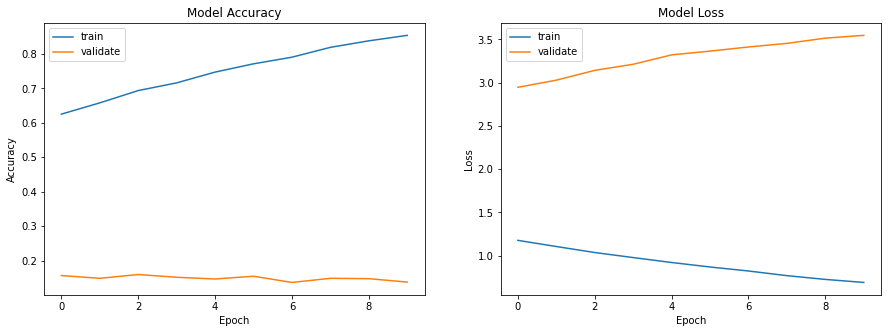

282/282 [==============================] - 13s 45ms/step - loss: 0.6109 - accuracy: 0.9011
Epoch 1/10
35/35 [==============================] - 13s 305ms/step - loss: 0.6072 - accuracy: 0.8934 - val_loss: 3.5583 - val_accuracy: 0.1390
Epoch 2/10
35/35 [==============================] - 8s 215ms/step - loss: 0.5722 - accuracy: 0.9081 - val_loss: 3.5856 - val_accuracy: 0.1400
Epoch 3/10
35/35 [==============================] - 8s 215ms/step - loss: 0.5381 - accuracy: 0.9208 - val_loss: 3.6100 - val_accuracy: 0.1410
Epoch 4/10
35/35 [==============================] - 8s 216ms/step - loss: 0.5037 - accuracy: 0.9330 - val_loss: 3.6245 - val_accuracy: 0.1450
Epoch 5/10
35/35 [==============================] - 7s 213ms/step - loss: 0.4738 - accuracy: 0.9430 - val_loss: 3.6428 - val_accuracy: 0.1420
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.9430 - val_loss: 3.6428 - val_accuracy: 0.1420
FOR Learning_rate=0.0001 and Batch_size=512


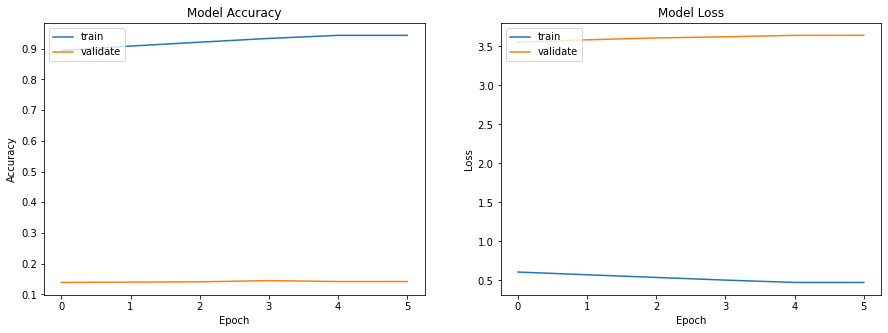

282/282 [==============================] - 13s 46ms/step - loss: 0.4321 - accuracy: 0.9598
Epoch 1/10
35/35 [==============================] - 5s 152ms/step - loss: 0.9079 - accuracy: 0.7174 - val_loss: 3.6798 - val_accuracy: 0.1510
Epoch 2/10
35/35 [==============================] - 5s 143ms/step - loss: 1.6250 - accuracy: 0.4420 - val_loss: 3.9432 - val_accuracy: 0.1490
Epoch 3/10
35/35 [==============================] - 5s 148ms/step - loss: 1.5790 - accuracy: 0.4455 - val_loss: 4.0053 - val_accuracy: 0.1280
Epoch 4/10
35/35 [==============================] - 6s 162ms/step - loss: 1.5352 - accuracy: 0.4642 - val_loss: 3.5705 - val_accuracy: 0.1490
Epoch 5/10
35/35 [==============================] - 5s 136ms/step - loss: 1.1939 - accuracy: 0.5816 - val_loss: 3.5523 - val_accuracy: 0.1490
Epoch 6/10
35/35 [==============================] - 5s 134ms/step - loss: 1.2091 - accuracy: 0.5730 - val_loss: 3.3224 - val_accuracy: 0.1630
Epoch 7/10
35/35 [==============================] - 5s 14

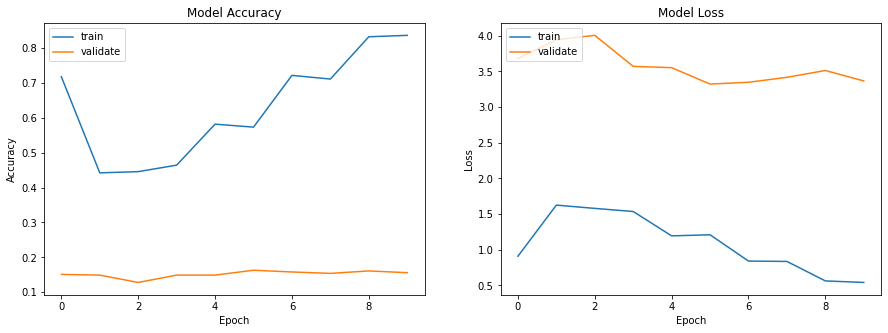

282/282 [==============================] - 13s 46ms/step - loss: 0.4758 - accuracy: 0.8643
Epoch 1/10
35/35 [==============================] - 6s 158ms/step - loss: 0.2447 - accuracy: 0.9562 - val_loss: 3.5276 - val_accuracy: 0.1580
Epoch 2/10
35/35 [==============================] - 5s 154ms/step - loss: 0.1446 - accuracy: 0.9867 - val_loss: 3.6139 - val_accuracy: 0.1560
Epoch 3/10
35/35 [==============================] - 5s 156ms/step - loss: 0.0904 - accuracy: 0.9964 - val_loss: 3.6790 - val_accuracy: 0.1590
Epoch 4/10
35/35 [==============================] - 6s 159ms/step - loss: 0.0700 - accuracy: 0.9986 - val_loss: 3.8002 - val_accuracy: 0.1560
Epoch 5/10
35/35 [==============================] - 5s 155ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 3.8980 - val_accuracy: 0.1480
Epoch 6/10
35/35 [==============================] - 6s 159ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 3.9640 - val_accuracy: 0.1510
Epoch 7/10
35/35 [==============================] - 5s 15

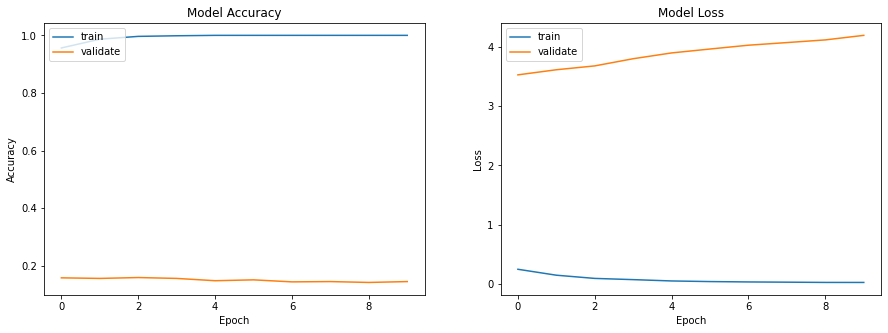

282/282 [==============================] - 13s 46ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 1/10
35/35 [==============================] - 8s 221ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 4.2191 - val_accuracy: 0.1430
Epoch 2/10
35/35 [==============================] - 8s 217ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 4.2589 - val_accuracy: 0.1450
Epoch 3/10
35/35 [==============================] - 8s 217ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 4.2833 - val_accuracy: 0.1470
Epoch 4/10
35/35 [==============================] - 8s 214ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 4.3104 - val_accuracy: 0.1450
Epoch 5/10
35/35 [==============================] - 8s 214ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 4.3279 - val_accuracy: 0.1440
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 4.3279 - val_accuracy: 0.1440
FOR Learning_rate=0.001 and Batch_size=512


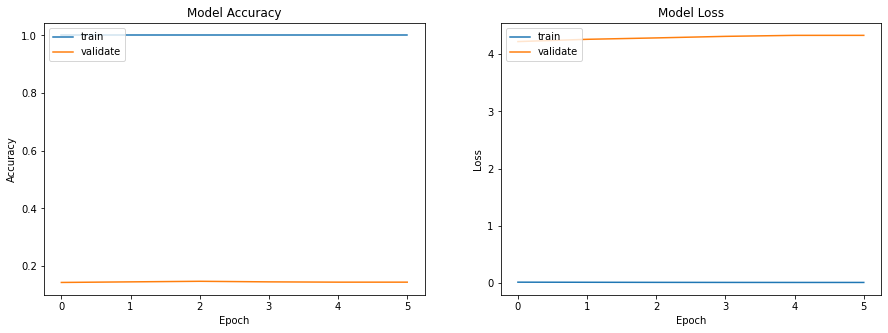

282/282 [==============================] - 13s 46ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1/10
35/35 [==============================] - 5s 149ms/step - loss: 1.0435 - accuracy: 0.7174 - val_loss: 1578.8646 - val_accuracy: 0.1090
Epoch 2/10
35/35 [==============================] - 5s 141ms/step - loss: 2.1787 - accuracy: 0.2613 - val_loss: 345.2644 - val_accuracy: 0.0860
Epoch 3/10
35/35 [==============================] - 5s 135ms/step - loss: 1.8865 - accuracy: 0.3474 - val_loss: 14.7883 - val_accuracy: 0.1650
Epoch 4/10
35/35 [==============================] - 5s 144ms/step - loss: 1.8036 - accuracy: 0.3695 - val_loss: 13.9453 - val_accuracy: 0.1680
Epoch 5/10
35/35 [==============================] - 5s 142ms/step - loss: 1.7329 - accuracy: 0.4204 - val_loss: 5.8688 - val_accuracy: 0.1350
Epoch 6/10
35/35 [==============================] - 5s 135ms/step - loss: 1.6457 - accuracy: 0.4327 - val_loss: 2.4518 - val_accuracy: 0.2110
Epoch 7/10
35/35 [==============================] 

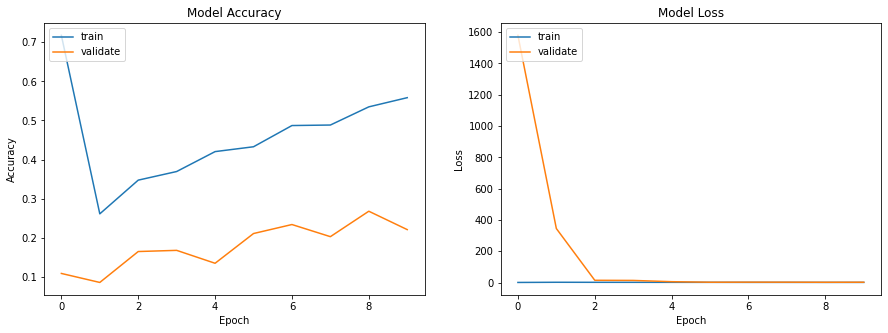

282/282 [==============================] - 14s 48ms/step - loss: 1.4594 - accuracy: 0.5036
Epoch 1/10
35/35 [==============================] - 6s 169ms/step - loss: 0.9973 - accuracy: 0.6464 - val_loss: 2.4638 - val_accuracy: 0.2030
Epoch 2/10
35/35 [==============================] - 6s 160ms/step - loss: 0.8638 - accuracy: 0.6961 - val_loss: 2.7797 - val_accuracy: 0.2130
Epoch 3/10
35/35 [==============================] - 5s 155ms/step - loss: 0.7692 - accuracy: 0.7238 - val_loss: 2.9289 - val_accuracy: 0.1770
Epoch 4/10
35/35 [==============================] - 6s 159ms/step - loss: 0.6348 - accuracy: 0.7806 - val_loss: 3.0443 - val_accuracy: 0.2180
Epoch 5/10
35/35 [==============================] - 6s 160ms/step - loss: 0.6007 - accuracy: 0.7929 - val_loss: 3.4512 - val_accuracy: 0.2090
Epoch 6/10
35/35 [==============================] - 5s 155ms/step - loss: 0.4834 - accuracy: 0.8301 - val_loss: 3.9761 - val_accuracy: 0.1660
Epoch 7/10
35/35 [==============================] - 6s 16

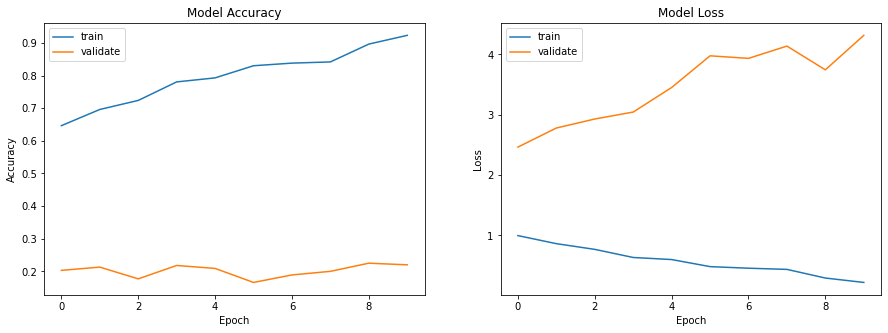

282/282 [==============================] - 13s 46ms/step - loss: 0.8036 - accuracy: 0.7358
Epoch 1/10
35/35 [==============================] - 8s 219ms/step - loss: 0.0456 - accuracy: 0.9904 - val_loss: 4.6004 - val_accuracy: 0.2240
Epoch 2/10
35/35 [==============================] - 7s 213ms/step - loss: 0.0079 - accuracy: 0.9998 - val_loss: 4.9718 - val_accuracy: 0.2120
Epoch 3/10
35/35 [==============================] - 8s 214ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.2571 - val_accuracy: 0.2160
Epoch 4/10
35/35 [==============================] - 7s 214ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 5.4936 - val_accuracy: 0.2170
Epoch 5/10
35/35 [==============================] - 7s 214ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.6897 - val_accuracy: 0.2160
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.6897 - val_accuracy: 0.2160
FOR Learning_rate=0.01 and Batch_size=512


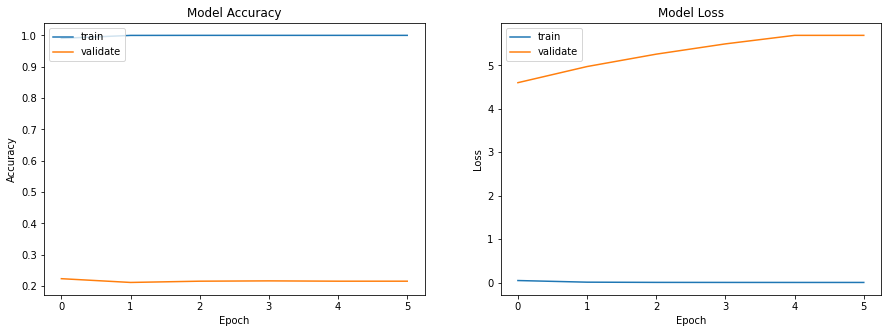

282/282 [==============================] - 13s 48ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 1/10
35/35 [==============================] - 5s 145ms/step - loss: 3.1014 - accuracy: 0.3607 - val_loss: 4490713.0000 - val_accuracy: 0.1090
Epoch 2/10
35/35 [==============================] - 5s 136ms/step - loss: 2.5651 - accuracy: 0.2053 - val_loss: 19315.2207 - val_accuracy: 0.0980
Epoch 3/10
35/35 [==============================] - 5s 146ms/step - loss: 2.2486 - accuracy: 0.2526 - val_loss: 5028.3965 - val_accuracy: 0.1100
Epoch 4/10
35/35 [==============================] - 5s 135ms/step - loss: 2.1199 - accuracy: 0.2794 - val_loss: 395.9425 - val_accuracy: 0.1530
Epoch 5/10
35/35 [==============================] - 5s 134ms/step - loss: 1.9023 - accuracy: 0.3309 - val_loss: 4.0913 - val_accuracy: 0.2130
Epoch 6/10
35/35 [==============================] - 5s 142ms/step - loss: 1.9554 - accuracy: 0.3392 - val_loss: 102.0501 - val_accuracy: 0.1390
Epoch 7/10
35/35 [======================

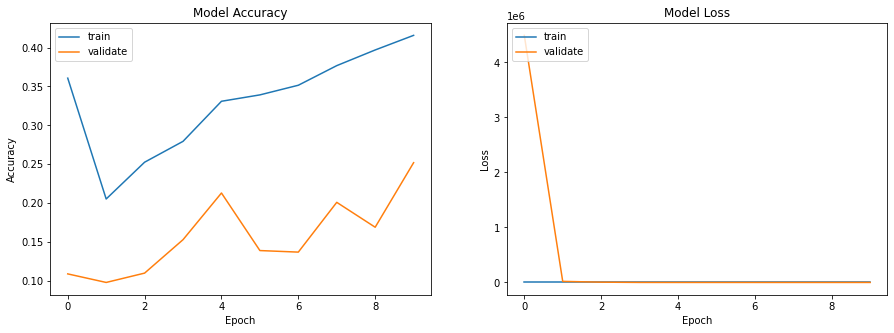

282/282 [==============================] - 13s 47ms/step - loss: 2.0521 - accuracy: 0.3097
Epoch 1/10
35/35 [==============================] - 6s 162ms/step - loss: 1.4700 - accuracy: 0.4726 - val_loss: 2.4018 - val_accuracy: 0.2320
Epoch 2/10
35/35 [==============================] - 6s 162ms/step - loss: 1.3968 - accuracy: 0.4962 - val_loss: 2.1472 - val_accuracy: 0.2550
Epoch 3/10
35/35 [==============================] - 5s 154ms/step - loss: 1.3388 - accuracy: 0.5119 - val_loss: 2.0426 - val_accuracy: 0.2470
Epoch 4/10
35/35 [==============================] - 6s 159ms/step - loss: 1.2811 - accuracy: 0.5420 - val_loss: 2.2257 - val_accuracy: 0.2240
Epoch 5/10
35/35 [==============================] - 6s 157ms/step - loss: 1.2318 - accuracy: 0.5538 - val_loss: 2.3193 - val_accuracy: 0.2150
Epoch 6/10
35/35 [==============================] - 5s 155ms/step - loss: 1.1812 - accuracy: 0.5652 - val_loss: 2.7922 - val_accuracy: 0.1420
Epoch 7/10
35/35 [==============================] - 5s 15

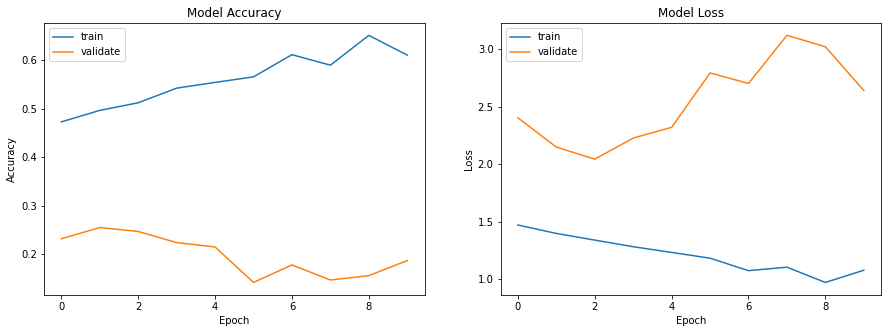

282/282 [==============================] - 14s 48ms/step - loss: 1.7479 - accuracy: 0.3946
Epoch 1/10
35/35 [==============================] - 8s 220ms/step - loss: 1.2116 - accuracy: 0.5625 - val_loss: 2.2499 - val_accuracy: 0.2140
Epoch 2/10
35/35 [==============================] - 8s 216ms/step - loss: 1.0672 - accuracy: 0.6102 - val_loss: 2.4603 - val_accuracy: 0.1910
Epoch 3/10
35/35 [==============================] - 8s 215ms/step - loss: 0.9103 - accuracy: 0.6697 - val_loss: 2.9416 - val_accuracy: 0.1580
Epoch 4/10
35/35 [==============================] - 7s 212ms/step - loss: 0.7791 - accuracy: 0.7155 - val_loss: 3.2594 - val_accuracy: 0.1490
Epoch 5/10
35/35 [==============================] - 7s 213ms/step - loss: 0.6382 - accuracy: 0.7666 - val_loss: 3.2271 - val_accuracy: 0.1670
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6382 - accuracy: 0.7666 - val_loss: 3.2271 - val_accuracy: 0.1670
FOR Learning_rate=0.1 and Batch_size=512


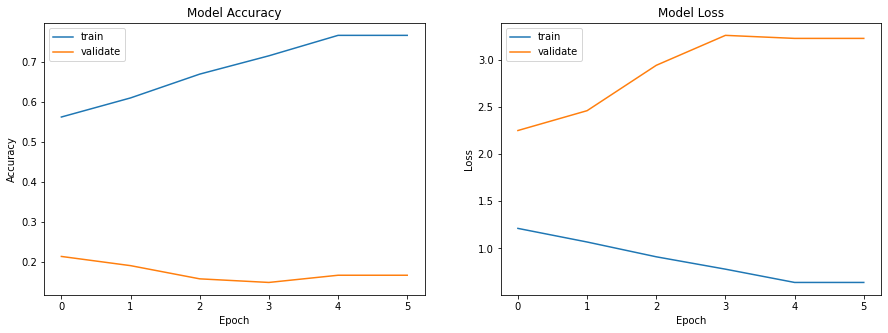

282/282 [==============================] - 14s 49ms/step - loss: 1.1683 - accuracy: 0.6062


In [ ]:
from tensorflow.keras.optimizers import SGD
H=[]
M_l=[[] for _ in range(4)]
M_a=[[] for _ in range(4)]
p=0
for i in lr_r:
  for k in bs:
    opt = SGD(learning_rate=i,momentum=0.9,decay = 1e-04) 
    model.compile(optimizer =opt ,loss='categorical_crossentropy', metrics=["accuracy"])
    history = model.fit(X_train,Y_train,steps_per_epoch=STEPS, batch_size = k, epochs=10, validation_data=(X_val, Y_val),callbacks=[es])
    print("FOR Learning_rate={} and Batch_size={}".format(i,k))
    plotmodelhistory(history)
    ModelLoss, ModelAccuracy = model.evaluate(X_train, Y_train)
    M_a[p].append(ModelAccuracy)
    M_l[p].append(ModelLoss)
  p+=1

Above the model was run on SGD OPTIMIZER and on 4 diff learning rates and 3 different batch sizes  (12 times).

The graph between Accuracy vs Epoch
                  Loss vs Epoch 
was drawn as epochs increases the accuracy should increase and loss should be decrease.

Below are accuracies of model with same learning rate(list of list) but diff batch sizes

In [ ]:
print(M_a)

[[0.3884444534778595, 0.9011111259460449, 0.9597777724266052], [0.8643333315849304, 1.0, 1.0], [0.5035555362701416, 0.7357777953147888, 1.0], [0.3096666634082794, 0.39455556869506836, 0.6062222123146057]]


In [ ]:
a_bs_max=[]
for i in range(4):
  u=max(M_a[i])
  a_bs_max.append(u)

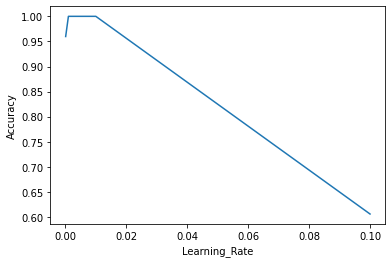

In [ ]:
plt.plot(lr_r,a_bs_max)
plt.xlabel("Learning_Rate")
plt.ylabel("Accuracy")
plt.show()


From the graph it is infer that Accuracy is highest at learning rate ~= 0.001

In [ ]:
i=lr_r[a_bs_max.index(max(a_bs_max))]
j=max(a_bs_max)
print('Model Accuracy is {} for learning_rate {}'.format(j,i))

Model Accuracy is 1.0 for learning_rate 0.001


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 5s 142ms/step - loss: 0.9541 - accuracy: 0.6586 - val_loss: 4.9850 - val_accuracy: 0.1630
Epoch 2/10
35/35 [==============================] - 5s 136ms/step - loss: 0.9005 - accuracy: 0.6748 - val_loss: 4.5979 - val_accuracy: 0.1710
Epoch 3/10
35/35 [==============================] - 5s 142ms/step - loss: 0.7331 - accuracy: 0.7398 - val_loss: 4.0369 - val_accuracy: 0.1710
Epoch 4/10
35/35 [==============================] - 5s 135ms/step - loss: 0.7320 - accuracy: 0.7285 - val_loss: 4.5172 - val_accuracy: 0.1710
Epoch 5/10
35/35 [==============================] - 5s 144ms/step - loss: 0.5853 - accuracy: 0.7899 - val_loss: 3.3501 - val_accuracy: 0.1780
Epoch 6/10
35/35 [==============================] - 5s 143ms/step - loss: 0.6827 - accuracy: 0.7575 - val_loss: 4.5757 - val_accuracy: 0.1710
Epoch 7/10
35/35 [==============================] - 8s 243ms/step - loss: 0.5432 - accuracy: 0.8049 - val_loss: 3.8054 - val_accuracy: 0.1810
Epoch 8/10
35/35 

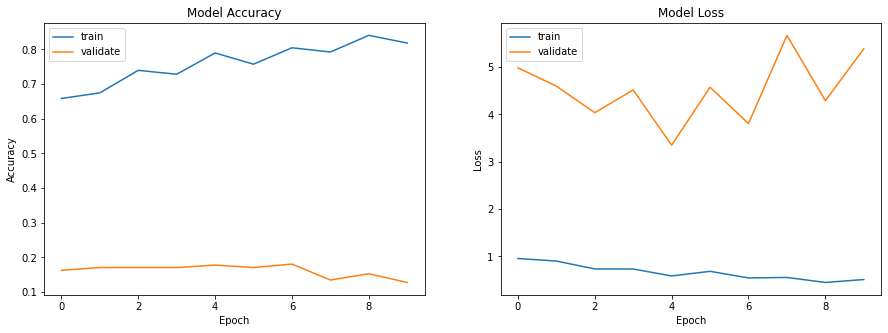

282/282 [==============================] - 24s 84ms/step - loss: 0.7762 - accuracy: 0.7486
Epoch 1/10
35/35 [==============================] - 6s 163ms/step - loss: 0.3524 - accuracy: 0.8777 - val_loss: 4.7697 - val_accuracy: 0.1780
Epoch 2/10
35/35 [==============================] - 5s 153ms/step - loss: 0.2416 - accuracy: 0.9141 - val_loss: 5.0510 - val_accuracy: 0.1770
Epoch 3/10
35/35 [==============================] - 5s 156ms/step - loss: 0.1793 - accuracy: 0.9353 - val_loss: 5.5561 - val_accuracy: 0.1810
Epoch 4/10
35/35 [==============================] - 6s 157ms/step - loss: 0.1905 - accuracy: 0.9379 - val_loss: 5.7268 - val_accuracy: 0.1950
Epoch 5/10
35/35 [==============================] - 6s 157ms/step - loss: 0.1767 - accuracy: 0.9398 - val_loss: 6.9648 - val_accuracy: 0.1620
Epoch 6/10
35/35 [==============================] - 5s 155ms/step - loss: 0.1681 - accuracy: 0.9439 - val_loss: 6.1038 - val_accuracy: 0.1790
Epoch 7/10
35/35 [==============================] - 6s 16

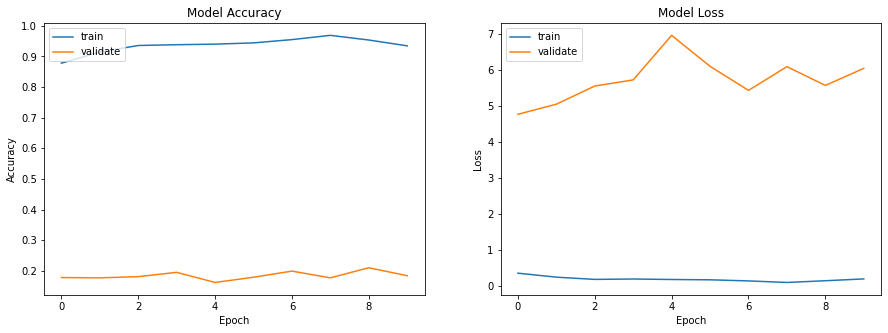

282/282 [==============================] - 13s 46ms/step - loss: 0.1385 - accuracy: 0.9582
Epoch 1/10
35/35 [==============================] - 8s 219ms/step - loss: 0.0807 - accuracy: 0.9732 - val_loss: 7.5821 - val_accuracy: 0.1840
Epoch 2/10
35/35 [==============================] - 7s 212ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 7.9652 - val_accuracy: 0.1440
Epoch 3/10
35/35 [==============================] - 8s 228ms/step - loss: 0.0389 - accuracy: 0.9856 - val_loss: 10.5782 - val_accuracy: 0.1550
Epoch 4/10
35/35 [==============================] - 7s 211ms/step - loss: 0.0401 - accuracy: 0.9855 - val_loss: 8.6319 - val_accuracy: 0.1720
Epoch 5/10
35/35 [==============================] - 7s 211ms/step - loss: 0.0442 - accuracy: 0.9844 - val_loss: 8.1252 - val_accuracy: 0.1740
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0442 - accuracy: 0.9844 - val_loss: 8.1252 - val_accuracy: 0.1740
FOR Learning_rate=0.0001 and Batch_size=512


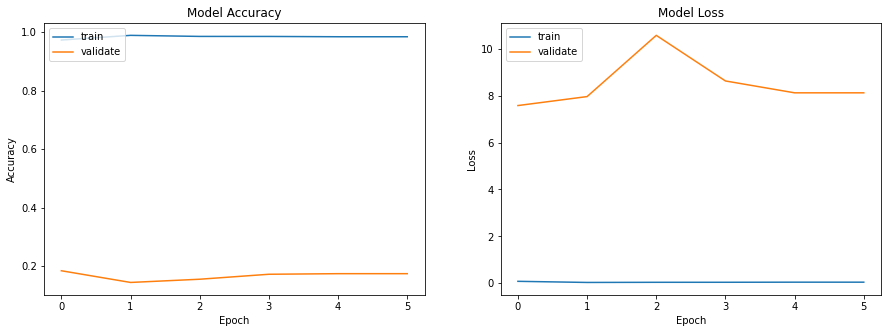

282/282 [==============================] - 13s 46ms/step - loss: 0.1322 - accuracy: 0.9557
Epoch 1/10
35/35 [==============================] - 5s 143ms/step - loss: 0.2193 - accuracy: 0.9290 - val_loss: 7.7939 - val_accuracy: 0.1720
Epoch 2/10
35/35 [==============================] - 5s 138ms/step - loss: 0.1664 - accuracy: 0.9436 - val_loss: 7.1287 - val_accuracy: 0.1740
Epoch 3/10
35/35 [==============================] - 5s 138ms/step - loss: 0.1271 - accuracy: 0.9575 - val_loss: 6.6658 - val_accuracy: 0.1750
Epoch 4/10
35/35 [==============================] - 5s 137ms/step - loss: 0.1146 - accuracy: 0.9604 - val_loss: 6.3054 - val_accuracy: 0.1570
Epoch 5/10
35/35 [==============================] - 5s 143ms/step - loss: 0.1557 - accuracy: 0.9431 - val_loss: 6.4831 - val_accuracy: 0.1890
Epoch 6/10
35/35 [==============================] - 5s 138ms/step - loss: 0.1497 - accuracy: 0.9454 - val_loss: 6.3065 - val_accuracy: 0.2050
Epoch 7/10
35/35 [==============================] - 5s 14

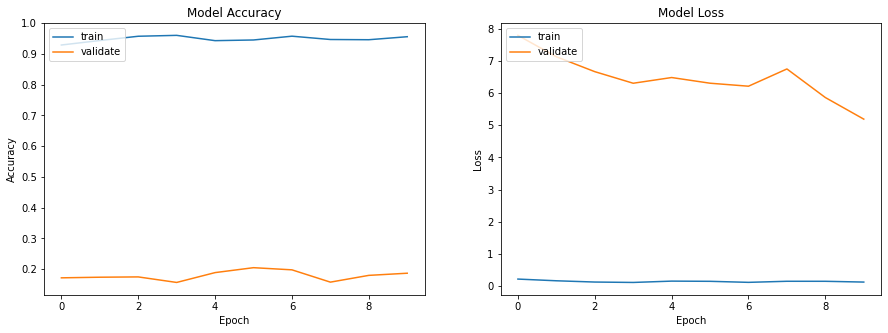

282/282 [==============================] - 13s 46ms/step - loss: 0.5358 - accuracy: 0.8649
Epoch 1/10
35/35 [==============================] - 6s 163ms/step - loss: 0.0835 - accuracy: 0.9706 - val_loss: 6.1035 - val_accuracy: 0.1960
Epoch 2/10
35/35 [==============================] - 5s 155ms/step - loss: 0.0747 - accuracy: 0.9750 - val_loss: 7.0940 - val_accuracy: 0.1430
Epoch 3/10
35/35 [==============================] - 5s 155ms/step - loss: 0.0844 - accuracy: 0.9729 - val_loss: 7.1663 - val_accuracy: 0.1860
Epoch 4/10
35/35 [==============================] - 6s 157ms/step - loss: 0.0689 - accuracy: 0.9772 - val_loss: 7.6350 - val_accuracy: 0.1950
Epoch 5/10
35/35 [==============================] - 6s 157ms/step - loss: 0.0648 - accuracy: 0.9781 - val_loss: 6.5757 - val_accuracy: 0.2040
Epoch 6/10
35/35 [==============================] - 5s 153ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 7.6429 - val_accuracy: 0.2040
Epoch 7/10
35/35 [==============================] - 6s 15

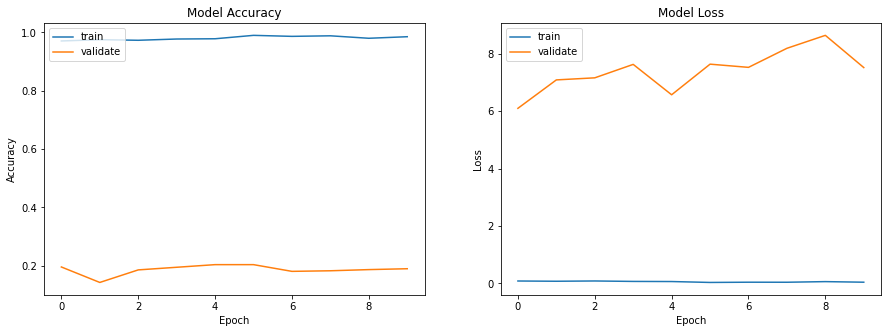

282/282 [==============================] - 13s 48ms/step - loss: 0.0901 - accuracy: 0.9684
Epoch 1/10
35/35 [==============================] - 8s 221ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 9.3582 - val_accuracy: 0.1820
Epoch 2/10
35/35 [==============================] - 7s 212ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 10.1032 - val_accuracy: 0.1510
Epoch 3/10
35/35 [==============================] - 8s 215ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 10.9023 - val_accuracy: 0.1720
Epoch 4/10
35/35 [==============================] - 8s 215ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 9.9516 - val_accuracy: 0.1850
Epoch 5/10
35/35 [==============================] - 8s 215ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 8.8134 - val_accuracy: 0.1960
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 8.8134 - val_accuracy: 0.1960
FOR Learning_rate=0.001 and Batch_size=512


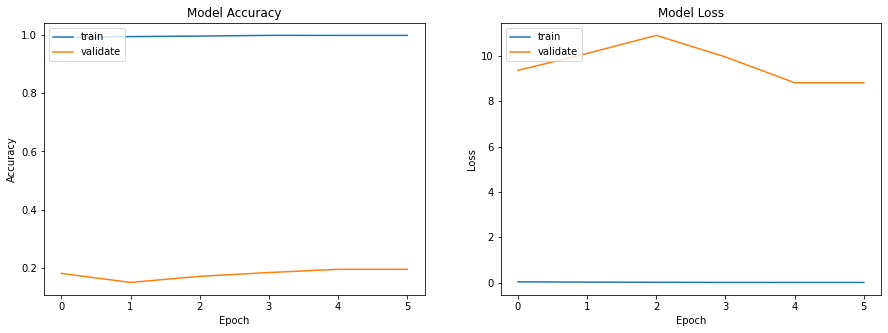

282/282 [==============================] - 13s 48ms/step - loss: 0.0288 - accuracy: 0.9892
Epoch 1/10
35/35 [==============================] - 5s 153ms/step - loss: 0.1149 - accuracy: 0.9659 - val_loss: 7.7014 - val_accuracy: 0.1680
Epoch 2/10
35/35 [==============================] - 5s 145ms/step - loss: 0.1135 - accuracy: 0.9619 - val_loss: 7.5374 - val_accuracy: 0.1920
Epoch 3/10
35/35 [==============================] - 5s 146ms/step - loss: 0.1241 - accuracy: 0.9620 - val_loss: 9.3981 - val_accuracy: 0.1560
Epoch 4/10
35/35 [==============================] - 5s 137ms/step - loss: 0.0750 - accuracy: 0.9741 - val_loss: 8.4080 - val_accuracy: 0.1880
Epoch 5/10
35/35 [==============================] - 5s 146ms/step - loss: 0.0719 - accuracy: 0.9792 - val_loss: 7.8802 - val_accuracy: 0.1910
Epoch 6/10
35/35 [==============================] - 5s 136ms/step - loss: 0.0822 - accuracy: 0.9715 - val_loss: 8.5536 - val_accuracy: 0.1480
Epoch 7/10
35/35 [==============================] - 5s 14

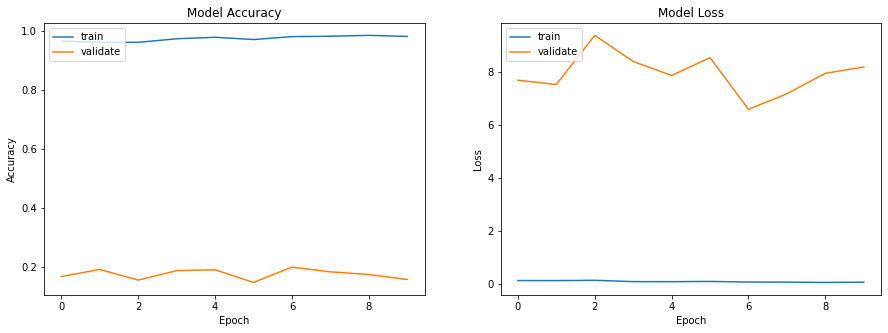

282/282 [==============================] - 13s 48ms/step - loss: 0.1495 - accuracy: 0.9521
Epoch 1/10
35/35 [==============================] - 6s 164ms/step - loss: 0.0511 - accuracy: 0.9834 - val_loss: 7.9551 - val_accuracy: 0.1900
Epoch 2/10
35/35 [==============================] - 6s 158ms/step - loss: 0.0367 - accuracy: 0.9870 - val_loss: 9.5905 - val_accuracy: 0.1720
Epoch 3/10
35/35 [==============================] - 6s 161ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 7.5561 - val_accuracy: 0.1960
Epoch 4/10
35/35 [==============================] - 6s 161ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 7.0624 - val_accuracy: 0.2130
Epoch 5/10
35/35 [==============================] - 5s 157ms/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 6.8394 - val_accuracy: 0.1940
Epoch 6/10
35/35 [==============================] - 5s 156ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 7.7867 - val_accuracy: 0.1980
Epoch 7/10
35/35 [==============================] - 6s 16

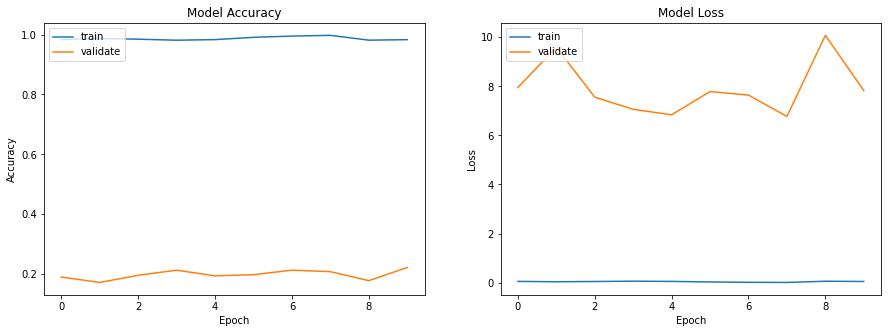

282/282 [==============================] - 14s 50ms/step - loss: 0.0780 - accuracy: 0.9729
Epoch 1/10
35/35 [==============================] - 8s 218ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 7.5248 - val_accuracy: 0.2170
Epoch 2/10
35/35 [==============================] - 8s 214ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 7.5853 - val_accuracy: 0.2260
Epoch 3/10
35/35 [==============================] - 8s 214ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 7.8527 - val_accuracy: 0.2360
Epoch 4/10
35/35 [==============================] - 7s 212ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 9.2330 - val_accuracy: 0.1820
Epoch 5/10
35/35 [==============================] - 7s 213ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 8.9202 - val_accuracy: 0.2040
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 8.9202 - val_accuracy: 0.2040
FOR Learning_rate=0.01 and Batch_size=512


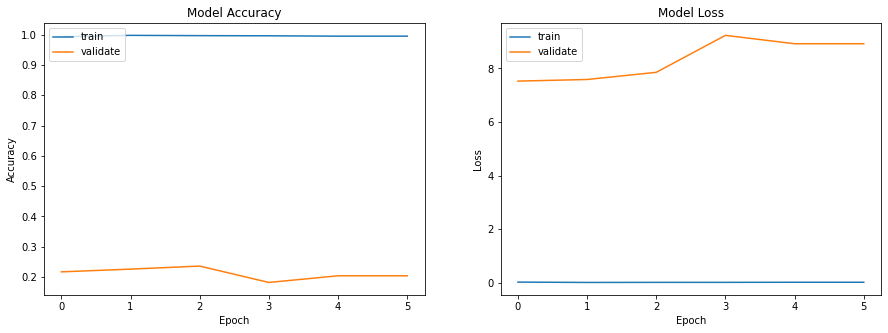

282/282 [==============================] - 13s 47ms/step - loss: 0.1223 - accuracy: 0.9644
Epoch 1/10
35/35 [==============================] - 5s 146ms/step - loss: 0.0940 - accuracy: 0.9714 - val_loss: 10.0844 - val_accuracy: 0.1720
Epoch 2/10
35/35 [==============================] - 5s 136ms/step - loss: 0.0869 - accuracy: 0.9712 - val_loss: 8.3136 - val_accuracy: 0.2090
Epoch 3/10
35/35 [==============================] - 5s 138ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 8.2599 - val_accuracy: 0.2230
Epoch 4/10
35/35 [==============================] - 5s 137ms/step - loss: 0.0479 - accuracy: 0.9816 - val_loss: 9.2019 - val_accuracy: 0.2090
Epoch 5/10
35/35 [==============================] - 5s 137ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 9.0643 - val_accuracy: 0.2060
Epoch 6/10
35/35 [==============================] - 5s 145ms/step - loss: 0.0856 - accuracy: 0.9723 - val_loss: 7.7398 - val_accuracy: 0.2000
Epoch 7/10
35/35 [==============================] - 5s 1

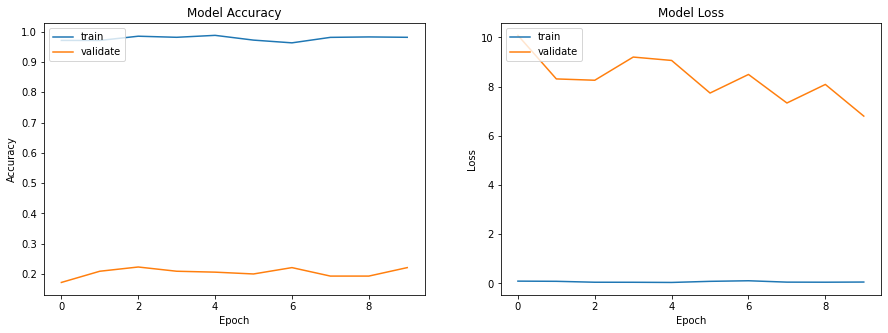

282/282 [==============================] - 14s 49ms/step - loss: 0.1848 - accuracy: 0.9431
Epoch 1/10
35/35 [==============================] - 6s 164ms/step - loss: 0.0484 - accuracy: 0.9837 - val_loss: 7.3790 - val_accuracy: 0.2080
Epoch 2/10
35/35 [==============================] - 5s 154ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 7.2499 - val_accuracy: 0.2070
Epoch 3/10
35/35 [==============================] - 5s 156ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 8.2209 - val_accuracy: 0.2070
Epoch 4/10
35/35 [==============================] - 6s 160ms/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 8.0006 - val_accuracy: 0.1940
Epoch 5/10
35/35 [==============================] - 6s 157ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 8.0905 - val_accuracy: 0.1990
Epoch 6/10
35/35 [==============================] - 6s 158ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 8.2557 - val_accuracy: 0.1860
Epoch 7/10
35/35 [==============================] - 6s 15

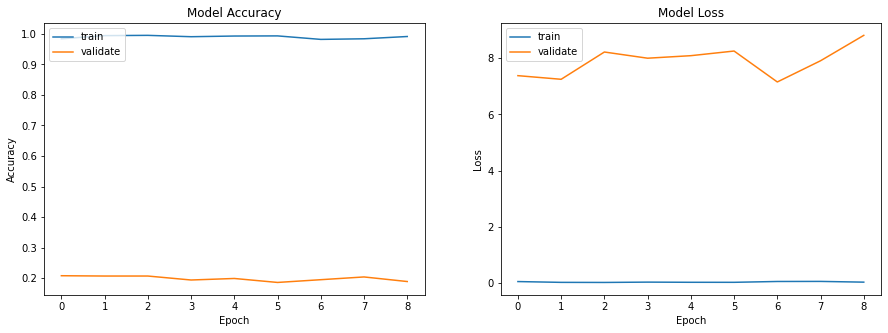

282/282 [==============================] - 14s 49ms/step - loss: 0.1158 - accuracy: 0.9583
Epoch 1/10
35/35 [==============================] - 8s 220ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 8.5280 - val_accuracy: 0.1730
Epoch 2/10
35/35 [==============================] - 8s 215ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 8.2478 - val_accuracy: 0.2100
Epoch 3/10
35/35 [==============================] - 8s 216ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 7.9558 - val_accuracy: 0.2190
Epoch 4/10
35/35 [==============================] - 7s 214ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 9.3408 - val_accuracy: 0.2030
Epoch 5/10
35/35 [==============================] - 8s 220ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 8.2067 - val_accuracy: 0.2260
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 8.2067 - val_accuracy: 0.2260
FOR Learning_rate=0.1 and Batch_size=512


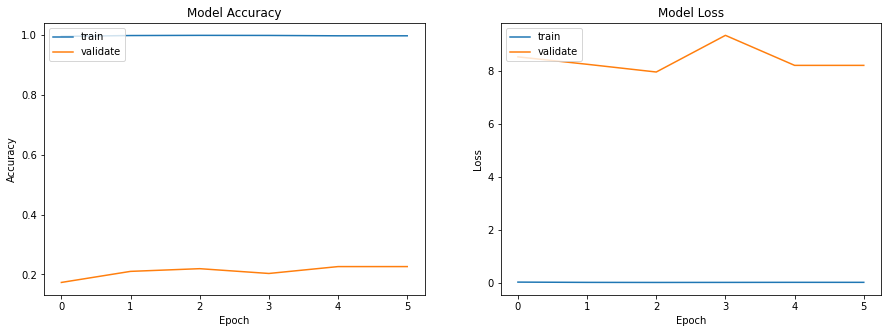

282/282 [==============================] - 14s 50ms/step - loss: 0.0250 - accuracy: 0.9908


In [ ]:
M_l_adam=[[] for _ in range(4)]
M_a_adam=[[] for _ in range(4)]
p=0
for i in lr_r:
  for k in bs:
    model.compile(optimizer ='adam' ,loss='categorical_crossentropy', metrics=["accuracy"])
    history = model.fit(X_train,Y_train,steps_per_epoch=STEPS, batch_size = k, epochs=10, validation_data=(X_val, Y_val),callbacks=[es])
    print("FOR Learning_rate={} and Batch_size={}".format(i,k))
    plotmodelhistory(history)
    ModelLoss, ModelAccuracy = model.evaluate(X_train, Y_train)
    M_a_adam[p].append(ModelAccuracy)
    M_l_adam[p].append(ModelLoss)
  p+=1

Above the model was run on ADAM OPTIMIZER and on 4 diff learning rates and 3 different batch sizes  (12 times).

The graph between Accuracy vs Epoch
                  Loss vs Epoch 
was drawn as epochs increases the accuracy should increase and loss should be decrease.

Below are accuracies of model with same learning rate(list of list) but diff batch sizes

In [ ]:
print(M_a_adam)

[[0.7485555410385132, 0.9582222104072571, 0.9556666612625122], [0.8648889064788818, 0.9684444665908813, 0.9892222285270691], [0.9521111249923706, 0.9728888869285583, 0.9644444584846497], [0.9431111216545105, 0.9583333134651184, 0.9907777905464172]]


In [ ]:
a_bs_max_adam=[]
for i in range(4):
  u=max(M_a_adam[i])
  a_bs_max_adam.append(u)

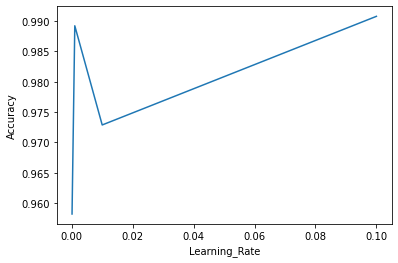

In [ ]:
plt.plot(lr_r,a_bs_max_adam)
plt.xlabel("Learning_Rate")
plt.ylabel("Accuracy")
plt.show()


From the graph it is infer that Accuracy is highest at learning rate ~= 0.1

In [ ]:
i=lr_r[a_bs_max_adam.index(max(a_bs_max_adam))]
j=max(a_bs_max_adam)
print('Model Accuracy is {} for learning_rate {}'.format(j,i))

Model Accuracy is 0.9907777905464172 for learning_rate 0.1


ON comaparing accuracies of both optimizer, 
SGD has highest accuracy 1 at lr 0.001 or 0.01 and at batch size 256,512 

### Semi_Supervised (ADAM Optimizer)

In [ ]:
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))
#use categorical_crossentropy since the label is one-hot encoded
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) 
model.compile(optimizer ='adam' ,loss='categorical_crossentropy', metrics=["accuracy"]) 

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")

STEPS = len(X_train) / 256

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model is train on 2000 labeled data then 6000 labels were predicted using train model and then both the data was merge and again trained

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 14s 183ms/step - loss: 2.0699 - accuracy: 0.3337 - val_loss: 10.1789 - val_accuracy: 0.1100
Epoch 2/20
35/35 [==============================] - 5s 153ms/step - loss: 1.4220 - accuracy: 0.4999 - val_loss: 2.6531 - val_accuracy: 0.1700
Epoch 3/20
35/35 [==============================] - 5s 153ms/step - loss: 1.2792 - accuracy: 0.5455 - val_loss: 2.8664 - val_accuracy: 0.1800
Epoch 4/20
35/35 [==============================] - 5s 145ms/step - loss: 1.1722 - accuracy: 0.5880 - val_loss: 3.2524 - val_accuracy: 0.1600
Epoch 5/20
35/35 [==============================] - 2s 65ms/step - loss: 0.8953 - accuracy: 0.6942 - val_loss: 3.9997 - val_accuracy: 0.1200


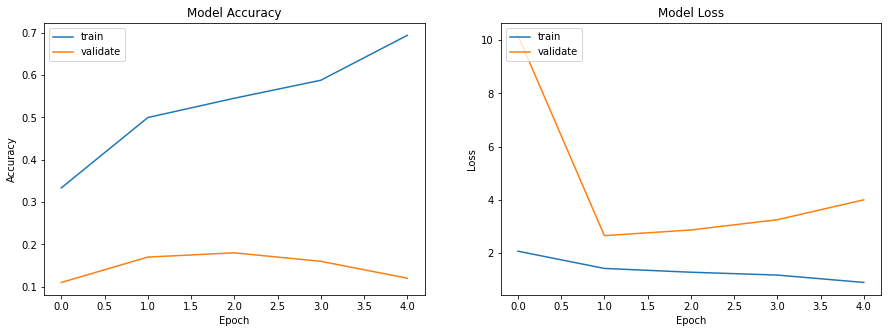

In [ ]:
x_train,y_train=X_train[:2000],Y_train[:2000]
x_train_pred,y_train_pred=X_train[2000:],Y_train[2000:]

history_ = model.fit(x_train[:1800],y_train[:1800],steps_per_epoch=STEPS, batch_size = 256, epochs=20, validation_data=(x_train[1800:],y_train[1800:]),callbacks=[es])
plotmodelhistory(history_)

In [ ]:
y_pred=model.predict(x_train_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
encoder.fit(y_pred)
y_pred=encoder.transform(y_pred).toarray()

In [ ]:
y_pred.shape

(7000, 10)

In [ ]:
new_y=np.concatenate((y_train,y_pred))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 8s 235ms/step - loss: 1.7179 - accuracy: 0.6134 - val_loss: 2.7367 - val_accuracy: 0.6459
Epoch 2/20
35/35 [==============================] - 7s 202ms/step - loss: 1.3328 - accuracy: 0.7254 - val_loss: 1.6182 - val_accuracy: 0.6183
Epoch 3/20
35/35 [==============================] - 8s 227ms/step - loss: 1.2494 - accuracy: 0.7423 - val_loss: 1.3911 - val_accuracy: 0.7267
Epoch 4/20
35/35 [==============================] - 9s 246ms/step - loss: 1.1750 - accuracy: 0.7733 - val_loss: 1.4194 - val_accuracy: 0.6804
Epoch 5/20
35/35 [==============================] - 8s 221ms/step - loss: 1.1160 - accuracy: 0.7999 - val_loss: 1.3918 - val_accuracy: 0.6670
Epoch 6/20
35/35 [==============================] - 7s 194ms/step - loss: 1.0426 - accuracy: 0.8396 - val_loss: 1.4940 - val_accuracy: 0.5139
Epoch 7/20
35/35 [==============================] - 8s 224ms/step - loss: 0.9854 - accuracy: 0.8700 - val_loss: 1.2899 - val_accuracy: 0.6572
Epoch 8/20
35/35 

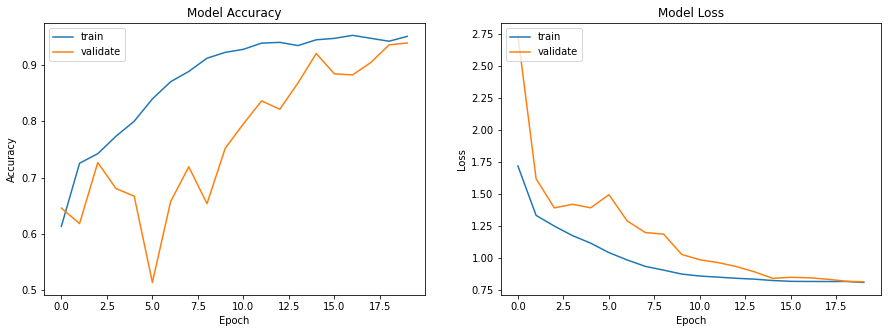

In [ ]:
#x_train,y_train=X_train[:2000],Y_train[:2000]
#x_train_pred,y_train_pred=X_train[2000:],Y_train[2000:]

history_ = model.fit(X_train,new_y,steps_per_epoch=STEPS, batch_size = 256, epochs=20, validation_data=(X_train,new_y),callbacks=[es])
plotmodelhistory(history_)

# **VGG-19**

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Conv2D(128, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Conv2D(256, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 1, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 1, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
#model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.MaxPooling2D(2, strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))
model.build(input_shape = (None,32,32,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 128)      

In [ ]:
lr_r=[0.0001,0.001,0.01,0.1]
bs=[128,256,512]

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train,Y_train=X_train[:10000], Y_train[:10000]
X_test,Y_test=X_test[:1000],Y_test[:1000]

# Normalize the data.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1,shuffle = True)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

In [ ]:
X_train = (augment_images(X_train, 123))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 6s 178ms/step - loss: 2.5052 - accuracy: 0.1107 - val_loss: 2.3038 - val_accuracy: 0.0820
Epoch 2/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3530 - accuracy: 0.1498 - val_loss: 2.3067 - val_accuracy: 0.0760
Epoch 3/10
35/35 [==============================] - 6s 174ms/step - loss: 2.2530 - accuracy: 0.1786 - val_loss: 2.3131 - val_accuracy: 0.0920
Epoch 4/10
35/35 [==============================] - 6s 170ms/step - loss: 2.1793 - accuracy: 0.2097 - val_loss: 2.3245 - val_accuracy: 0.0800
Epoch 5/10
35/35 [==============================] - 6s 164ms/step - loss: 2.1302 - accuracy: 0.2181 - val_loss: 2.3399 - val_accuracy: 0.0910
Epoch 6/10
35/35 [==============================] - 6s 162ms/step - loss: 2.0768 - accuracy: 0.2301 - val_loss: 2.3713 - val_accuracy: 0.0920
Epoch 7/10
35/35 [==============================] - 6s 175ms/step - loss: 2.0369 - accuracy: 0.2598 - val_loss: 2.3864 - val_accuracy: 0.1110
Epoch 8/10
35/35 

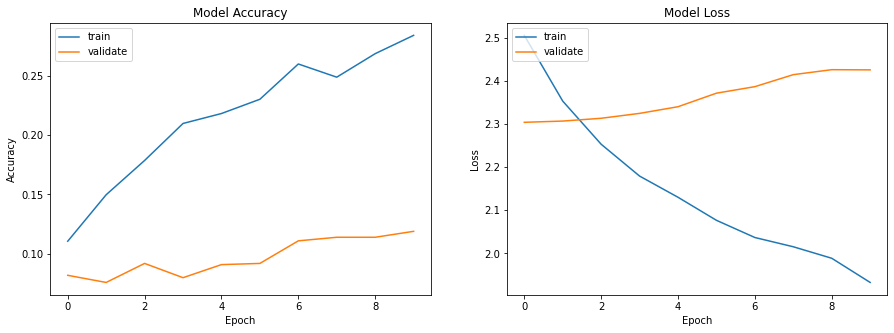

282/282 [==============================] - 10s 34ms/step - loss: 2.3883 - accuracy: 0.1138
Epoch 1/10
35/35 [==============================] - 10s 275ms/step - loss: 1.9252 - accuracy: 0.2910 - val_loss: 2.3562 - val_accuracy: 0.1200
Epoch 2/10
35/35 [==============================] - 10s 278ms/step - loss: 1.9033 - accuracy: 0.2947 - val_loss: 2.3327 - val_accuracy: 0.1280
Epoch 3/10
35/35 [==============================] - 11s 313ms/step - loss: 1.8807 - accuracy: 0.3072 - val_loss: 2.2136 - val_accuracy: 0.1460
Epoch 4/10
35/35 [==============================] - 10s 286ms/step - loss: 1.8542 - accuracy: 0.3137 - val_loss: 2.2030 - val_accuracy: 0.1600
Epoch 5/10
35/35 [==============================] - 10s 272ms/step - loss: 1.8279 - accuracy: 0.3274 - val_loss: 2.1680 - val_accuracy: 0.1730
Epoch 6/10
35/35 [==============================] - 9s 271ms/step - loss: 1.8080 - accuracy: 0.3286 - val_loss: 2.0949 - val_accuracy: 0.1920
Epoch 7/10
35/35 [==============================] - 

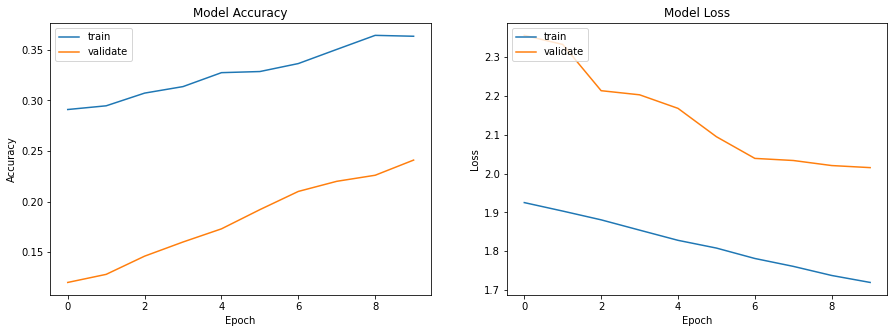

282/282 [==============================] - 10s 34ms/step - loss: 1.6358 - accuracy: 0.4241
Epoch 1/10
35/35 [==============================] - 17s 470ms/step - loss: 1.6908 - accuracy: 0.3802 - val_loss: 2.0342 - val_accuracy: 0.2370
Epoch 2/10
35/35 [==============================] - 16s 467ms/step - loss: 1.6772 - accuracy: 0.3807 - val_loss: 2.0157 - val_accuracy: 0.2490
Epoch 3/10
35/35 [==============================] - 16s 464ms/step - loss: 1.6577 - accuracy: 0.3871 - val_loss: 2.0605 - val_accuracy: 0.2330
Epoch 4/10
35/35 [==============================] - 16s 463ms/step - loss: 1.6332 - accuracy: 0.3970 - val_loss: 2.0312 - val_accuracy: 0.2460
Epoch 5/10
35/35 [==============================] - 16s 465ms/step - loss: 1.6237 - accuracy: 0.4018 - val_loss: 2.0162 - val_accuracy: 0.2540
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 1.6237 - accuracy: 0.4018 - val_loss: 2.0162 - val_accuracy: 0.2540
FOR Learning_rate=0.0001 and Batch_size=512


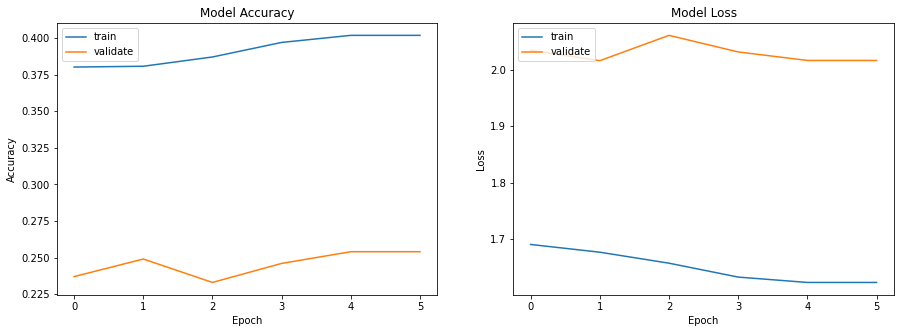

282/282 [==============================] - 9s 32ms/step - loss: 1.4929 - accuracy: 0.4777
Epoch 1/10
35/35 [==============================] - 6s 176ms/step - loss: 1.7245 - accuracy: 0.3566 - val_loss: 2.3703 - val_accuracy: 0.1990
Epoch 2/10
35/35 [==============================] - 6s 162ms/step - loss: 1.6728 - accuracy: 0.3854 - val_loss: 4.0944 - val_accuracy: 0.1500
Epoch 3/10
35/35 [==============================] - 6s 166ms/step - loss: 1.6196 - accuracy: 0.4017 - val_loss: 2.4069 - val_accuracy: 0.2470
Epoch 4/10
35/35 [==============================] - 6s 169ms/step - loss: 1.5691 - accuracy: 0.4257 - val_loss: 2.8381 - val_accuracy: 0.2040
Epoch 5/10
35/35 [==============================] - 6s 164ms/step - loss: 1.4820 - accuracy: 0.4527 - val_loss: 2.6051 - val_accuracy: 0.2270
Epoch 6/10
35/35 [==============================] - 6s 174ms/step - loss: 1.4870 - accuracy: 0.4456 - val_loss: 1.9875 - val_accuracy: 0.3000
Epoch 7/10
35/35 [==============================] - 6s 171

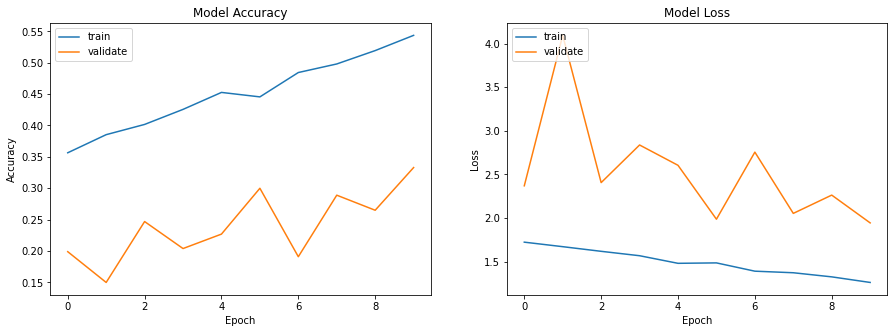

282/282 [==============================] - 10s 35ms/step - loss: 1.2399 - accuracy: 0.5402
Epoch 1/10
35/35 [==============================] - 9s 265ms/step - loss: 1.1399 - accuracy: 0.5823 - val_loss: 2.3788 - val_accuracy: 0.2390
Epoch 2/10
35/35 [==============================] - 10s 271ms/step - loss: 1.0906 - accuracy: 0.6037 - val_loss: 1.9141 - val_accuracy: 0.3130
Epoch 3/10
35/35 [==============================] - 9s 270ms/step - loss: 1.0031 - accuracy: 0.6371 - val_loss: 2.3817 - val_accuracy: 0.2680
Epoch 4/10
35/35 [==============================] - 9s 261ms/step - loss: 0.9381 - accuracy: 0.6647 - val_loss: 2.4810 - val_accuracy: 0.2390
Epoch 5/10
35/35 [==============================] - 9s 260ms/step - loss: 0.8442 - accuracy: 0.6978 - val_loss: 2.3438 - val_accuracy: 0.2730
Epoch 6/10
35/35 [==============================] - 9s 269ms/step - loss: 0.7790 - accuracy: 0.7260 - val_loss: 2.3036 - val_accuracy: 0.2970
Epoch 7/10
35/35 [==============================] - 9s 2

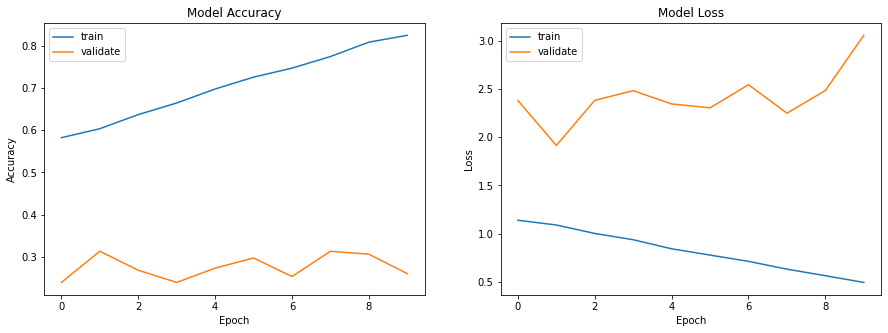

282/282 [==============================] - 9s 33ms/step - loss: 1.0424 - accuracy: 0.6117
Epoch 1/10
35/35 [==============================] - 16s 469ms/step - loss: 0.9281 - accuracy: 0.6672 - val_loss: 1.9410 - val_accuracy: 0.3410
Epoch 2/10
35/35 [==============================] - 16s 465ms/step - loss: 0.8122 - accuracy: 0.7153 - val_loss: 2.0291 - val_accuracy: 0.3300
Epoch 3/10
35/35 [==============================] - 16s 464ms/step - loss: 0.7113 - accuracy: 0.7577 - val_loss: 2.1190 - val_accuracy: 0.3010
Epoch 4/10
35/35 [==============================] - 16s 465ms/step - loss: 0.6005 - accuracy: 0.7951 - val_loss: 2.7597 - val_accuracy: 0.2480
Epoch 5/10
35/35 [==============================] - 17s 477ms/step - loss: 0.5089 - accuracy: 0.8327 - val_loss: 2.8308 - val_accuracy: 0.2540
Epoch 6/10
35/35 [==============================] - 1s 20ms/step - loss: 0.5089 - accuracy: 0.8327 - val_loss: 2.8308 - val_accuracy: 0.2540
FOR Learning_rate=0.001 and Batch_size=512


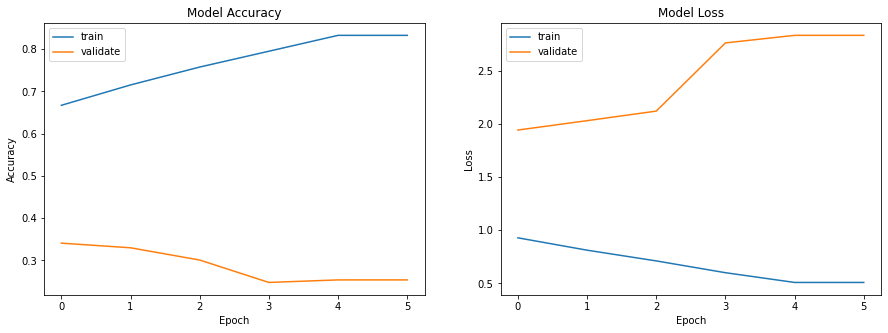

282/282 [==============================] - 16s 56ms/step - loss: 0.7863 - accuracy: 0.6954
Epoch 1/10
35/35 [==============================] - 6s 179ms/step - loss: 2.0540 - accuracy: 0.2721 - val_loss: 13.4470 - val_accuracy: 0.2030
Epoch 2/10
35/35 [==============================] - 6s 164ms/step - loss: 1.8566 - accuracy: 0.3177 - val_loss: 8.4115 - val_accuracy: 0.1190
Epoch 3/10
35/35 [==============================] - 6s 175ms/step - loss: 1.7173 - accuracy: 0.3641 - val_loss: 3.9464 - val_accuracy: 0.2060
Epoch 4/10
35/35 [==============================] - 6s 172ms/step - loss: 1.6543 - accuracy: 0.3863 - val_loss: 3.4987 - val_accuracy: 0.1780
Epoch 5/10
35/35 [==============================] - 7s 197ms/step - loss: 1.5380 - accuracy: 0.4286 - val_loss: 2.5687 - val_accuracy: 0.2110
Epoch 6/10
35/35 [==============================] - 7s 197ms/step - loss: 1.4843 - accuracy: 0.4617 - val_loss: 2.7119 - val_accuracy: 0.2020
Epoch 7/10
35/35 [==============================] - 7s 2

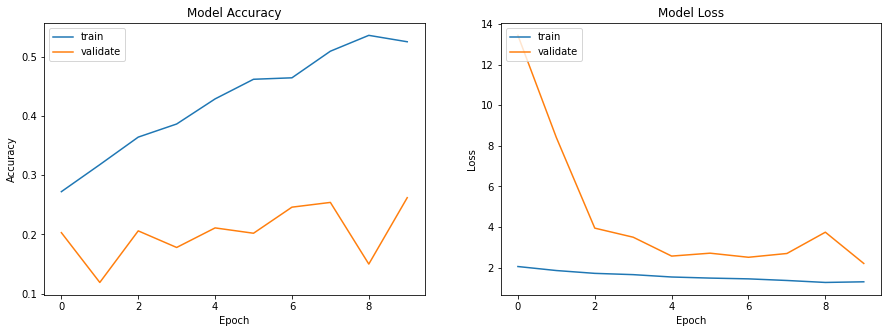

282/282 [==============================] - 10s 34ms/step - loss: 1.2045 - accuracy: 0.5553
Epoch 1/10
35/35 [==============================] - 10s 295ms/step - loss: 1.0803 - accuracy: 0.6092 - val_loss: 3.0153 - val_accuracy: 0.2220
Epoch 2/10
35/35 [==============================] - 10s 285ms/step - loss: 1.0205 - accuracy: 0.6300 - val_loss: 4.0214 - val_accuracy: 0.1400
Epoch 3/10
35/35 [==============================] - 10s 280ms/step - loss: 0.9337 - accuracy: 0.6604 - val_loss: 4.2511 - val_accuracy: 0.1650
Epoch 4/10
35/35 [==============================] - 10s 277ms/step - loss: 0.8485 - accuracy: 0.6924 - val_loss: 4.5006 - val_accuracy: 0.1680
Epoch 5/10
35/35 [==============================] - 9s 260ms/step - loss: 0.7741 - accuracy: 0.7207 - val_loss: 3.3767 - val_accuracy: 0.2710
Epoch 6/10
35/35 [==============================] - 9s 269ms/step - loss: 0.6985 - accuracy: 0.7443 - val_loss: 3.3669 - val_accuracy: 0.2370
Epoch 7/10
35/35 [==============================] - 1

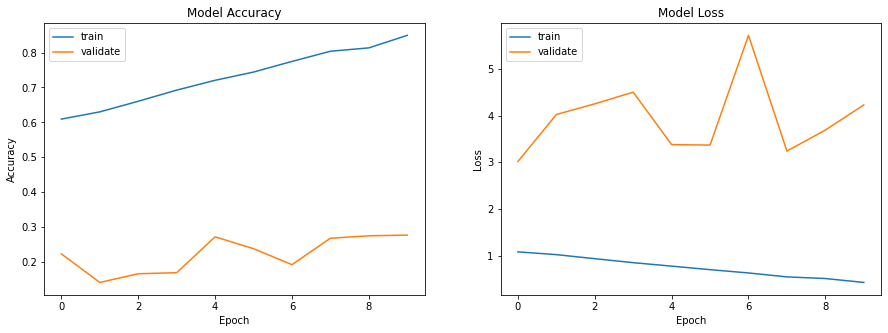

282/282 [==============================] - 14s 48ms/step - loss: 0.7357 - accuracy: 0.7708
Epoch 1/10
35/35 [==============================] - 17s 489ms/step - loss: 0.1430 - accuracy: 0.9563 - val_loss: 4.6883 - val_accuracy: 0.2340
Epoch 2/10
35/35 [==============================] - 17s 497ms/step - loss: 0.0390 - accuracy: 0.9911 - val_loss: 4.4301 - val_accuracy: 0.2750
Epoch 3/10
35/35 [==============================] - 17s 488ms/step - loss: 0.0135 - accuracy: 0.9981 - val_loss: 4.7289 - val_accuracy: 0.2670
Epoch 4/10
35/35 [==============================] - 17s 499ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 4.7537 - val_accuracy: 0.2730
Epoch 5/10
35/35 [==============================] - 17s 478ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.9562 - val_accuracy: 0.2740
Epoch 6/10
35/35 [==============================] - 1s 19ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.9562 - val_accuracy: 0.2740
FOR Learning_rate=0.01 and Batch_size=512


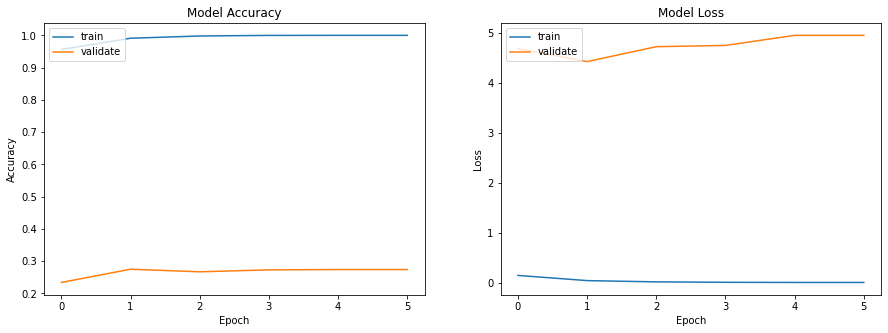

282/282 [==============================] - 18s 65ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1/10
35/35 [==============================] - 7s 208ms/step - loss: 1.8615 - accuracy: 0.3813 - val_loss: 46.3910 - val_accuracy: 0.1090
Epoch 2/10
35/35 [==============================] - 7s 192ms/step - loss: 2.3052 - accuracy: 0.1015 - val_loss: 2.2911 - val_accuracy: 0.0980
Epoch 3/10
35/35 [==============================] - 7s 194ms/step - loss: 2.3063 - accuracy: 0.0970 - val_loss: 2.3033 - val_accuracy: 0.1050
Epoch 4/10
35/35 [==============================] - 8s 227ms/step - loss: 2.3060 - accuracy: 0.1044 - val_loss: 2.3078 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 7s 200ms/step - loss: 2.3057 - accuracy: 0.0994 - val_loss: 2.3058 - val_accuracy: 0.0920
Epoch 6/10
35/35 [==============================] - 7s 192ms/step - loss: 2.3027 - accuracy: 0.1062 - val_loss: 2.3051 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 6s 1

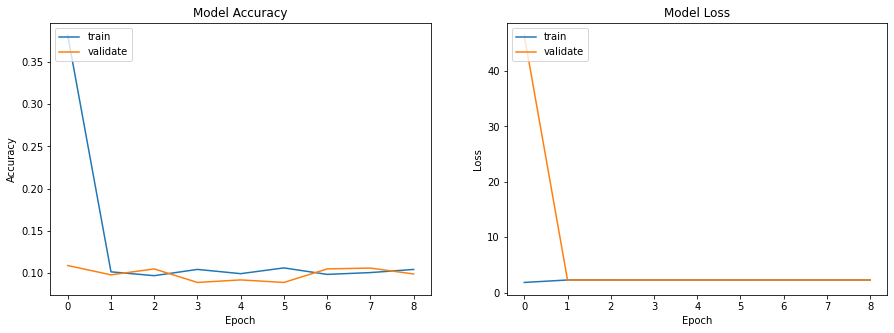

282/282 [==============================] - 10s 35ms/step - loss: 34.4537 - accuracy: 0.0996
Epoch 1/10
35/35 [==============================] - 10s 274ms/step - loss: 2.3056 - accuracy: 0.0972 - val_loss: 2.3316 - val_accuracy: 0.1180
Epoch 2/10
35/35 [==============================] - 9s 268ms/step - loss: 2.3035 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 9s 266ms/step - loss: 2.3045 - accuracy: 0.0942 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 9s 251ms/step - loss: 2.3037 - accuracy: 0.1010 - val_loss: 2.3039 - val_accuracy: 0.1050
Epoch 5/10
35/35 [==============================] - 9s 260ms/step - loss: 2.3035 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.1050
Epoch 6/10
35/35 [==============================] - 9s 255ms/step - loss: 2.3035 - accuracy: 0.0938 - val_loss: 2.3027 - val_accuracy: 0.1050
Epoch 7/10
35/35 [==============================] - 9s 

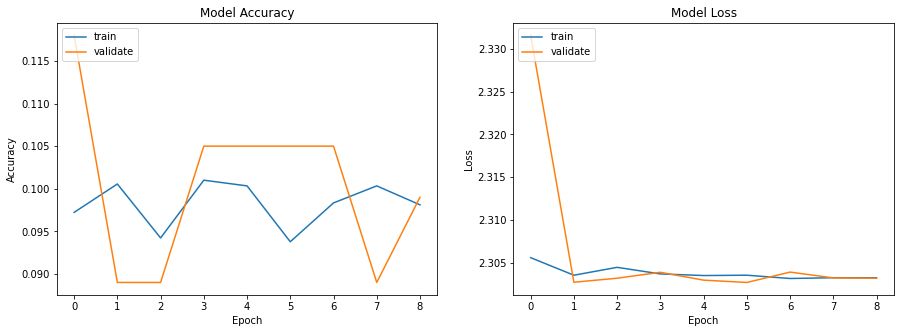

282/282 [==============================] - 22s 77ms/step - loss: 2.3251 - accuracy: 0.1012
Epoch 1/10
35/35 [==============================] - 17s 477ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3025 - val_accuracy: 0.0930
Epoch 2/10
35/35 [==============================] - 16s 468ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3029 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 16s 456ms/step - loss: 2.3029 - accuracy: 0.1017 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 16s 465ms/step - loss: 2.3026 - accuracy: 0.1027 - val_loss: 2.3039 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 16s 454ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3034 - val_accuracy: 0.1050
Epoch 6/10
35/35 [==============================] - 0s 10ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3034 - val_accuracy: 0.1050
FOR Learning_rate=0.1 and Batch_size=512


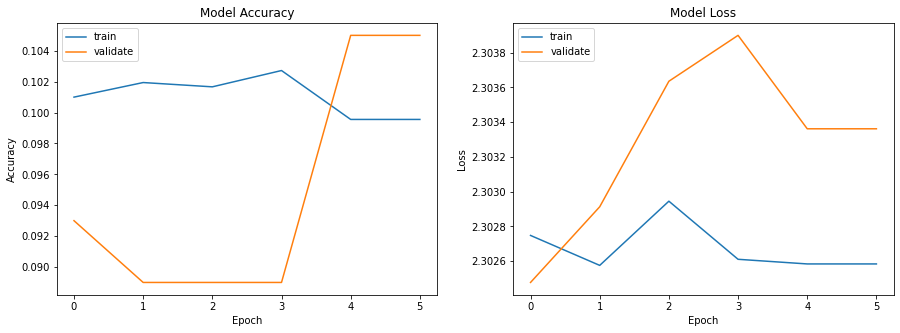

282/282 [==============================] - 10s 37ms/step - loss: 2.3022 - accuracy: 0.1030


In [ ]:

from tensorflow.keras.optimizers import SGD
M_l_1=[[] for _ in range(4)]
M_a_1=[[] for _ in range(4)]
p=0
for i in lr_r:
  for k in bs:
    opt = SGD(learning_rate=i,momentum=0.9,decay = 1e-04) 
    model.compile(optimizer =opt ,loss='categorical_crossentropy', metrics=["accuracy"])
    history = model.fit(X_train,Y_train,steps_per_epoch=STEPS, batch_size = k,validation_data=(X_val,Y_val), epochs=10,callbacks=[es])
    print("FOR Learning_rate={} and Batch_size={}".format(i,k))
    plotmodelhistory(history)
    ModelLoss, ModelAccuracy = model.evaluate(X_train, Y_train)
    M_a_1[p].append(ModelAccuracy)
    M_l_1[p].append(ModelLoss)
  p+=1

Above the model was run on SGD OPTIMIZER and on 4 diff learning rates and 3 different batch sizes (12 times).

The graph between Accuracy vs Epoch Loss vs Epoch was drawn as epochs increases the accuracy should increase and loss should be decrease.

Below are accuracies of model with same learning rate(list of list) but diff batch sizes

In [ ]:
print(M_a_1)

[[0.1137777790427208, 0.42411109805107117, 0.4776666760444641], [0.5402222275733948, 0.6116666793823242, 0.6954444646835327], [0.5553333163261414, 0.7707777619361877, 1.0], [0.09955555200576782, 0.10122222453355789, 0.10300000011920929]]


In [ ]:
a_bs_max1=[]
for i in range(4):
  u=max(M_a_1[i])
  a_bs_max1.append(u)

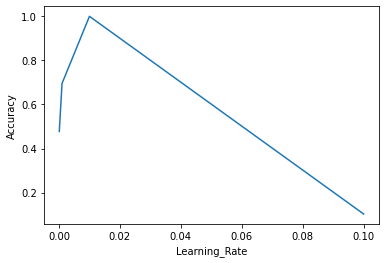

In [ ]:
plt.plot(lr_r,a_bs_max1)
plt.xlabel("Learning_Rate")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
i=lr_r[a_bs_max1.index(max(a_bs_max1))]
j=max(a_bs_max1)
print('Model Accuracy is {} for learning_rate {}'.format(j,i))

Model Accuracy is 1.0 for learning_rate 0.01


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 6s 170ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3032 - val_accuracy: 0.0990
Epoch 2/10
35/35 [==============================] - 6s 160ms/step - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 6s 161ms/step - loss: 2.3014 - accuracy: 0.1079 - val_loss: 2.3040 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 6s 160ms/step - loss: 2.3037 - accuracy: 0.0949 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3025 - accuracy: 0.1042 - val_loss: 2.3034 - val_accuracy: 0.0990
Epoch 6/10
35/35 [==============================] - 6s 169ms/step - loss: 2.3024 - accuracy: 0.1066 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 6s 169ms/step - loss: 2.3016 - accuracy: 0.1092 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 8/10
35/35 

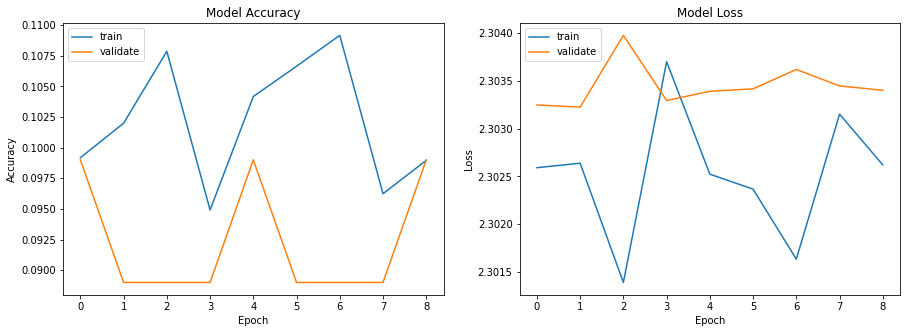

282/282 [==============================] - 10s 35ms/step - loss: 2.3022 - accuracy: 0.1019
Epoch 1/10
35/35 [==============================] - 9s 267ms/step - loss: 2.3024 - accuracy: 0.1029 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 9s 262ms/step - loss: 2.3023 - accuracy: 0.1046 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 9s 253ms/step - loss: 2.3023 - accuracy: 0.0970 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 9s 253ms/step - loss: 2.3024 - accuracy: 0.1058 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 9s 253ms/step - loss: 2.3022 - accuracy: 0.1063 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 9s 252ms/step - loss: 2.3022 - accuracy: 0.1031 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 9s 26

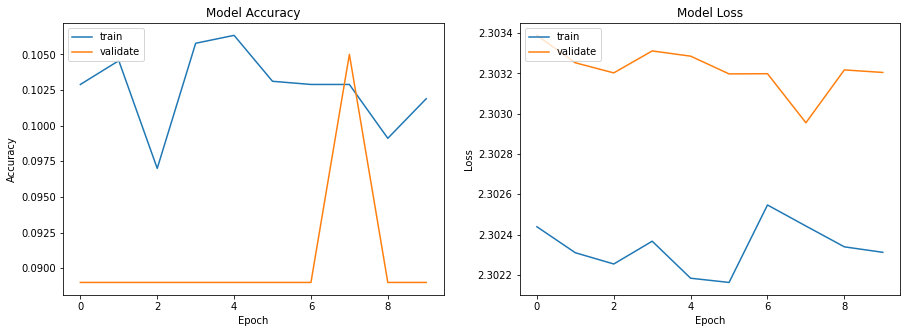

282/282 [==============================] - 10s 36ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 16s 454ms/step - loss: 2.3023 - accuracy: 0.1051 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3022 - accuracy: 0.1049 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3022 - accuracy: 0.1006 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3022 - accuracy: 0.1037 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3022 - accuracy: 0.1025 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 2.3022 - accuracy: 0.1025 - val_loss: 2.3032 - val_accuracy: 0.0890
FOR Learning_rate=0.0001 and Batch_size=512


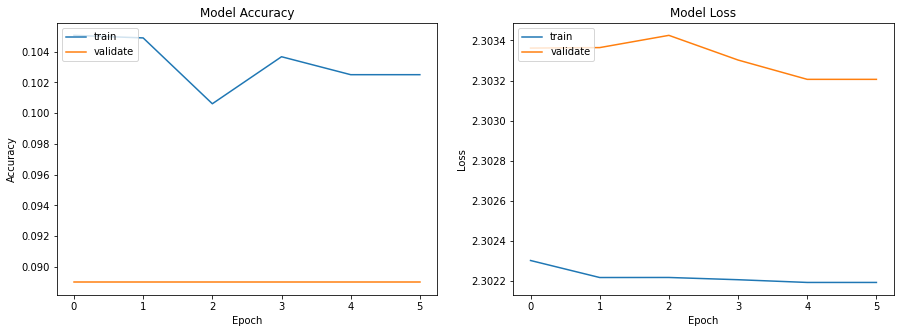

282/282 [==============================] - 10s 36ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3024 - accuracy: 0.0987 - val_loss: 2.3033 - val_accuracy: 0.1050
Epoch 2/10
35/35 [==============================] - 6s 162ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 6s 164ms/step - loss: 2.3025 - accuracy: 0.1044 - val_loss: 2.3035 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 6s 161ms/step - loss: 2.3023 - accuracy: 0.1024 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3023 - accuracy: 0.0996 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 6s 160ms/step - loss: 2.3024 - accuracy: 0.1024 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 6s 16

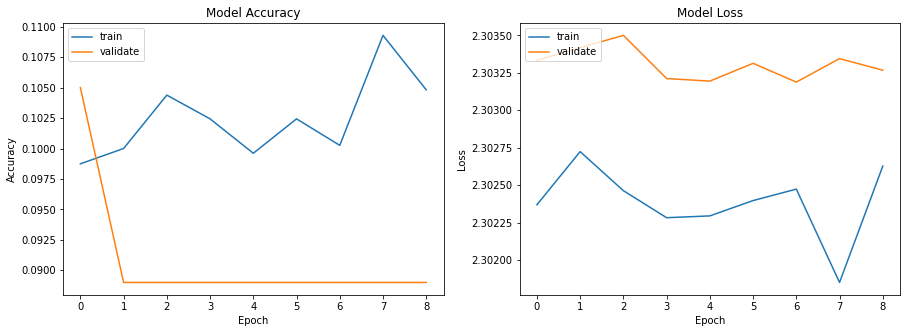

282/282 [==============================] - 10s 35ms/step - loss: 2.3021 - accuracy: 0.1030
Epoch 1/10
35/35 [==============================] - 9s 258ms/step - loss: 2.3024 - accuracy: 0.1001 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 9s 261ms/step - loss: 2.3021 - accuracy: 0.1031 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 9s 261ms/step - loss: 2.3022 - accuracy: 0.1044 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 9s 261ms/step - loss: 2.3025 - accuracy: 0.1040 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 9s 253ms/step - loss: 2.3021 - accuracy: 0.1004 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 9s 255ms/step - loss: 2.3023 - accuracy: 0.1060 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 9s 26

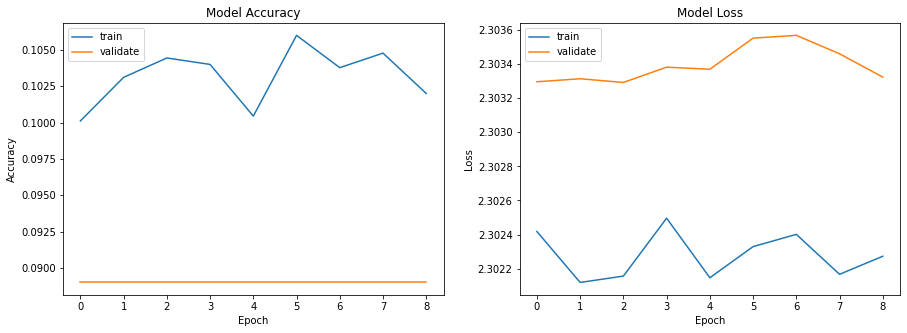

282/282 [==============================] - 10s 36ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 16s 453ms/step - loss: 2.3024 - accuracy: 0.1018 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3022 - accuracy: 0.1045 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 16s 448ms/step - loss: 2.3022 - accuracy: 0.1039 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3023 - accuracy: 0.1003 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 16s 446ms/step - loss: 2.3022 - accuracy: 0.1038 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 0s 10ms/step - loss: 2.3022 - accuracy: 0.1038 - val_loss: 2.3032 - val_accuracy: 0.0890
FOR Learning_rate=0.001 and Batch_size=512


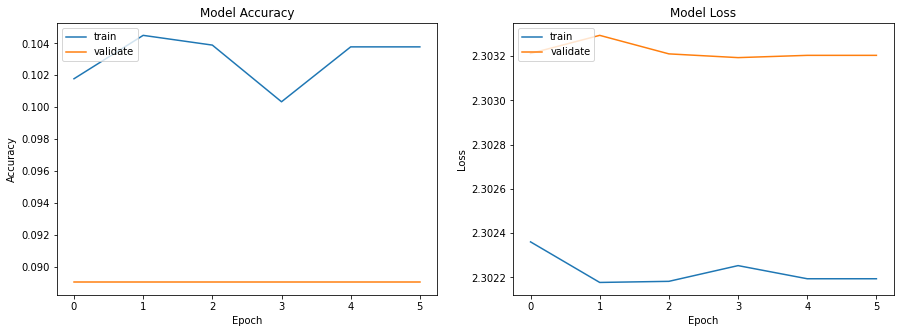

282/282 [==============================] - 9s 34ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 6s 168ms/step - loss: 2.3018 - accuracy: 0.1044 - val_loss: 2.3037 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3033 - accuracy: 0.1004 - val_loss: 2.3031 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3018 - accuracy: 0.1035 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 6s 161ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 6s 163ms/step - loss: 2.3020 - accuracy: 0.1081 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 6s 162ms/step - loss: 2.3023 - accuracy: 0.0991 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 6s 164

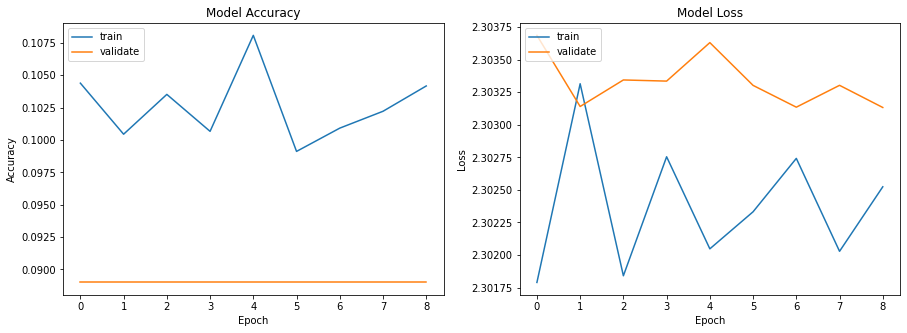

282/282 [==============================] - 10s 35ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 9s 267ms/step - loss: 2.3023 - accuracy: 0.1033 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 9s 261ms/step - loss: 2.3021 - accuracy: 0.1068 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 9s 252ms/step - loss: 2.3023 - accuracy: 0.1057 - val_loss: 2.3035 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 9s 263ms/step - loss: 2.3022 - accuracy: 0.1032 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 9s 253ms/step - loss: 2.3022 - accuracy: 0.1020 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 9s 262ms/step - loss: 2.3023 - accuracy: 0.1039 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 9s 26

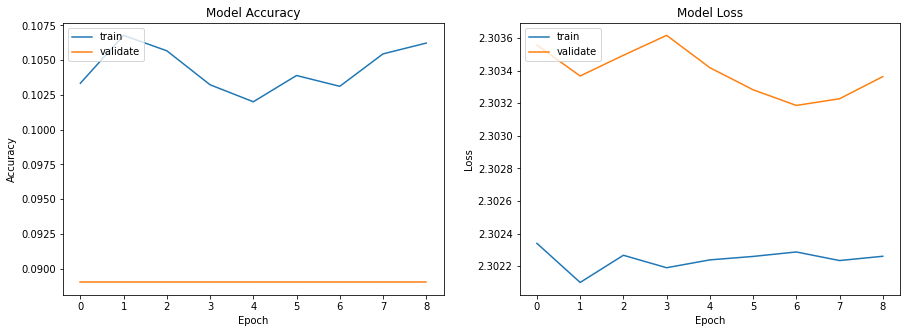

282/282 [==============================] - 10s 36ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 16s 454ms/step - loss: 2.3023 - accuracy: 0.1027 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 16s 448ms/step - loss: 2.3022 - accuracy: 0.1026 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 16s 449ms/step - loss: 2.3022 - accuracy: 0.1054 - val_loss: 2.3035 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 16s 450ms/step - loss: 2.3022 - accuracy: 0.1050 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 16s 447ms/step - loss: 2.3022 - accuracy: 0.1043 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 0s 10ms/step - loss: 2.3022 - accuracy: 0.1043 - val_loss: 2.3034 - val_accuracy: 0.0890
FOR Learning_rate=0.01 and Batch_size=512


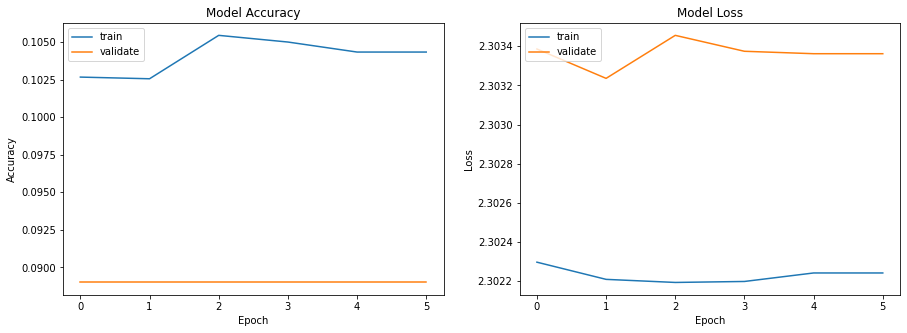

282/282 [==============================] - 11s 38ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 6s 173ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3031 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 6s 164ms/step - loss: 2.3023 - accuracy: 0.1066 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 6s 165ms/step - loss: 2.3020 - accuracy: 0.1066 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 6s 171ms/step - loss: 2.3025 - accuracy: 0.0960 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 6s 173ms/step - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3031 - val_accuracy: 0.0990
Epoch 6/10
35/35 [==============================] - 6s 170ms/step - loss: 2.3026 - accuracy: 0.0940 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 6s 16

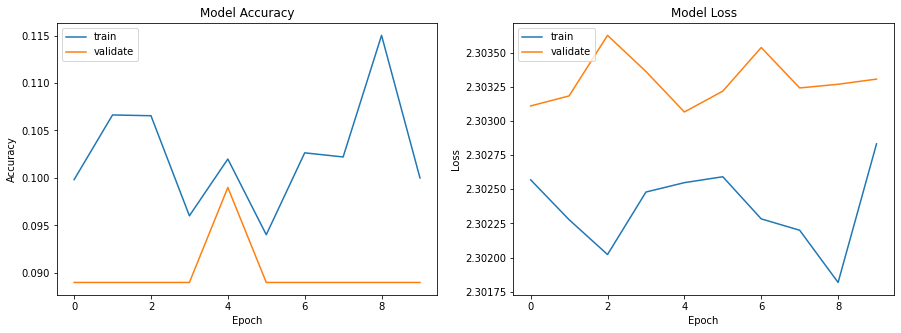

282/282 [==============================] - 10s 36ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 9s 260ms/step - loss: 2.3022 - accuracy: 0.1061 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 9s 263ms/step - loss: 2.3022 - accuracy: 0.1058 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 9s 253ms/step - loss: 2.3021 - accuracy: 0.1027 - val_loss: 2.3034 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 9s 262ms/step - loss: 2.3023 - accuracy: 0.1032 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 9s 262ms/step - loss: 2.3022 - accuracy: 0.1031 - val_loss: 2.3036 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 9s 258ms/step - loss: 2.3021 - accuracy: 0.1047 - val_loss: 2.3035 - val_accuracy: 0.0890
Epoch 7/10
35/35 [==============================] - 9s 26

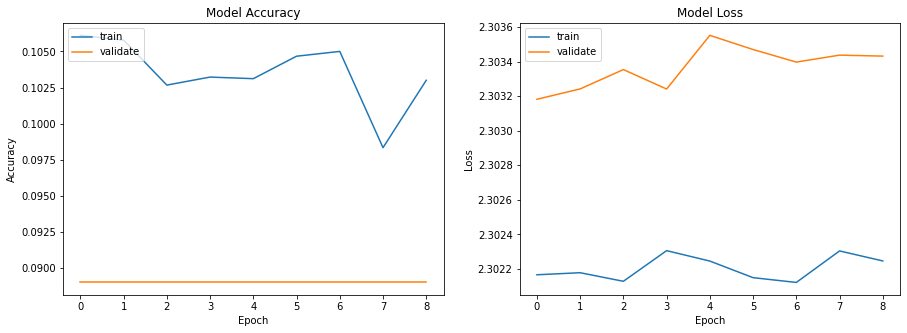

282/282 [==============================] - 11s 38ms/step - loss: 2.3021 - accuracy: 0.1046
Epoch 1/10
35/35 [==============================] - 16s 455ms/step - loss: 2.3021 - accuracy: 0.1046 - val_loss: 2.3032 - val_accuracy: 0.0890
Epoch 2/10
35/35 [==============================] - 16s 452ms/step - loss: 2.3022 - accuracy: 0.1057 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 3/10
35/35 [==============================] - 16s 460ms/step - loss: 2.3022 - accuracy: 0.1029 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 4/10
35/35 [==============================] - 16s 461ms/step - loss: 2.3022 - accuracy: 0.1036 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 5/10
35/35 [==============================] - 16s 448ms/step - loss: 2.3022 - accuracy: 0.1030 - val_loss: 2.3033 - val_accuracy: 0.0890
Epoch 6/10
35/35 [==============================] - 0s 10ms/step - loss: 2.3022 - accuracy: 0.1030 - val_loss: 2.3033 - val_accuracy: 0.0890
FOR Learning_rate=0.1 and Batch_size=512


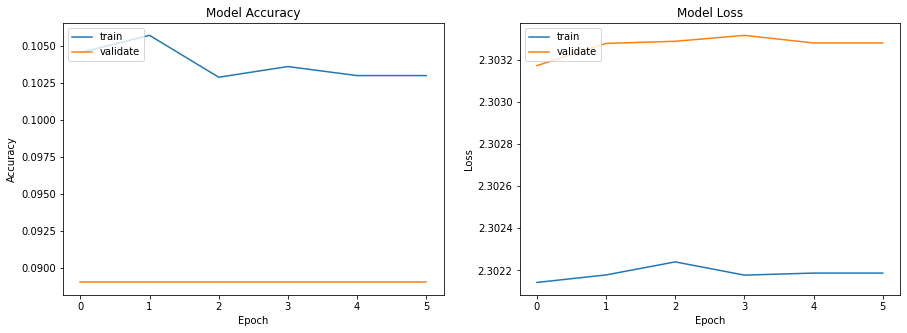

282/282 [==============================] - 10s 36ms/step - loss: 2.3021 - accuracy: 0.1046


In [ ]:

M_l_adam_1=[[] for _ in range(4)]
M_a_adam_1=[[] for _ in range(4)]
p=0
for i in lr_r:
  for k in bs:
    model.compile(optimizer ='adam' ,loss='categorical_crossentropy', metrics=["accuracy"])
    history = model.fit(X_train,Y_train,steps_per_epoch=STEPS, batch_size = k,validation_data=(X_val,Y_val), epochs=10,callbacks=[es])
    print("FOR Learning_rate={} and Batch_size={}".format(i,k))
    plotmodelhistory(history)
    ModelLoss, ModelAccuracy = model.evaluate(X_train, Y_train)
    M_a_adam_1[p].append(ModelAccuracy)
    M_l_adam_1[p].append(ModelLoss)
  p+=1

Above the model was run on ADAM OPTIMIZER and on 4 diff learning rates and 3 different batch sizes (12 times).

The graph between Accuracy vs Epoch Loss vs Epoch was drawn as epochs increases the accuracy should increase and loss should be decrease.

Below are accuracies of model with same learning rate(list of list) but diff batch sizes

In [ ]:
print(M_a_adam_1)

[[0.10188888758420944, 0.10455555468797684, 0.10455555468797684], [0.10300000011920929, 0.10455555468797684, 0.10455555468797684], [0.10455555468797684, 0.10455555468797684, 0.10455555468797684], [0.10455555468797684, 0.10455555468797684, 0.10455555468797684]]


In [ ]:
a_bs_max1_adam=[]
for i in range(4):
  u=max(M_a_adam_1[i])
  a_bs_max1_adam.append(u)

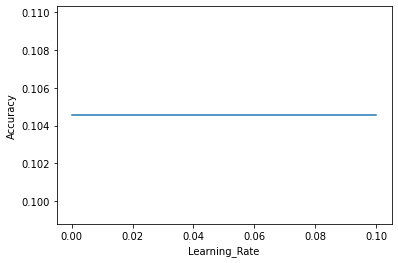

In [ ]:
plt.plot(lr_r,a_bs_max1_adam)
plt.xlabel("Learning_Rate")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
i=lr_r[a_bs_max1_adam.index(max(a_bs_max1_adam))]
j=max(a_bs_max1_adam)
print('Model Accuracy is {} for learning_rate {}'.format(j,i))

Model Accuracy is 0.10455555468797684 for learning_rate 0.0001


ON comaparing accuracies of both optimizer, 
SGD has highest accuracy 1 at lr 0.01 and at batch size 256

Semi_Supervised (ADAM)

Model is train on 2000 labeled data then 6000 labels were predicted using train model and then both the data was merge and again trained

In [ ]:
opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) 
model.compile(optimizer ='adam' ,loss='categorical_crossentropy', metrics=["accuracy"]) 

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")

STEPS = len(X_train) / 256

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 10s 295ms/step - loss: 2.3015 - accuracy: 0.1176 - val_loss: 2.3090 - val_accuracy: 0.0750
Epoch 2/20
35/35 [==============================] - 8s 226ms/step - loss: 2.3003 - accuracy: 0.1163 - val_loss: 2.3119 - val_accuracy: 0.0750
Epoch 3/20
35/35 [==============================] - 8s 232ms/step - loss: 2.2996 - accuracy: 0.1162 - val_loss: 2.3142 - val_accuracy: 0.0750
Epoch 4/20
35/35 [==============================] - 8s 227ms/step - loss: 2.2986 - accuracy: 0.1216 - val_loss: 2.3160 - val_accuracy: 0.0750
Epoch 5/20
35/35 [==============================] - 4s 102ms/step - loss: 2.2986 - accuracy: 0.1200 - val_loss: 2.3159 - val_accuracy: 0.0750


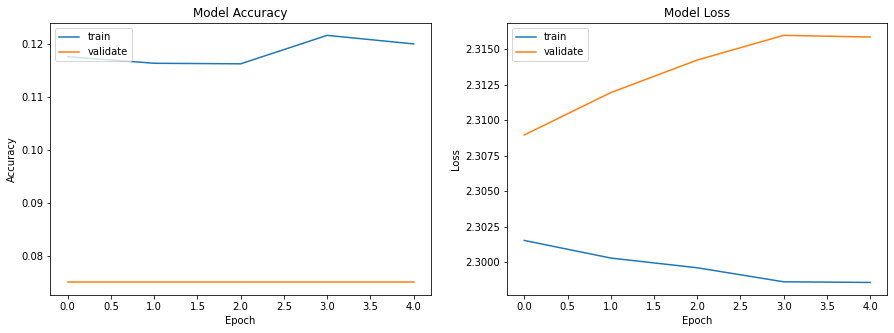

In [ ]:
x_train,y_train=X_train[:2000],Y_train[:2000]
x_train_pred,y_train_pred=X_train[2000:],Y_train[2000:]

history_ = model.fit(x_train[:1800],y_train[:1800],steps_per_epoch=STEPS, batch_size = 256, epochs=20, validation_data=(x_train[1800:],y_train[1800:]),callbacks=[es])
plotmodelhistory(history_)

In [ ]:
y_pred=model.predict(x_train_pred)
new_y=np.concatenate((y_train,y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 14s 398ms/step - loss: 2.3003 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 2/20
35/35 [==============================] - 14s 391ms/step - loss: 2.3003 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 3/20
35/35 [==============================] - 11s 323ms/step - loss: 2.3002 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 4/20
35/35 [==============================] - 14s 392ms/step - loss: 2.3003 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 5/20
35/35 [==============================] - 11s 324ms/step - loss: 2.3002 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 6/20
35/35 [==============================] - 11s 325ms/step - loss: 2.3003 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 7/20
35/35 [==============================] - 11s 324ms/step - loss: 2.3003 - accuracy: 0.8034 - val_loss: 2.3002 - val_accuracy: 0.8034
Epoch 8/20

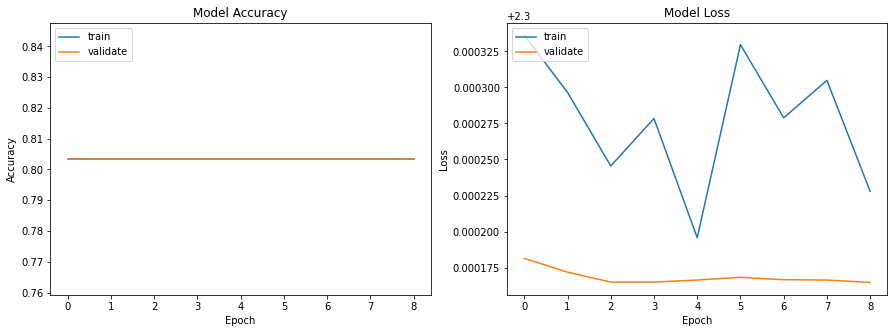

In [ ]:
x_train,y_train=X_train[:2000],Y_train[:2000]
x_train_pred,y_train_pred=X_train[2000:],Y_train[2000:]

history_ = model.fit(X_train,new_y,steps_per_epoch=STEPS, batch_size = 256, epochs=20, validation_data=(X_train,new_y),callbacks=[es])
plotmodelhistory(history_)

# **n-Layer MLP**

In [ ]:
batch_size = 256
hidden_units = 256
image_size = X_train.shape[1]
input_size = image_size * image_size*3
n=10

model=Sequential()
model.add(Dense(hidden_units, input_shape=(32*32*3,)))
for i in range(n-2):
  model.add(Dense(hidden_units))
model.add(Dense(10))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.build(input_shape = input_size)
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 256)               786688    
                                                                 
 dense_108 (Dense)           (None, 256)               65792     
                                                                 
 dense_109 (Dense)           (None, 256)               65792     
                                                                 
 dense_110 (Dense)           (None, 256)               65792     
                                                                 
 dense_111 (Dense)           (None, 256)               65792     
                                                                 
 dense_112 (Dense)           (None, 256)               65792     
                                                                 
 dense_113 (Dense)           (None, 256)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train,Y_train=X_train[:10000], Y_train[:10000]
X_test,Y_test=X_test[:1000],Y_test[:1000]

# Normalize the data.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1,shuffle = True)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

In [ ]:
X_train = (augment_images(X_train, 123))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],32*32*3)

In [ ]:
history=model.fit(X_train,Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
 1/36 [..............................] - ETA: 2s - loss: 1.8088 - accuracy: 0.3242

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


36/36 [==============================] - 2s 65ms/step - loss: 1.8287 - accuracy: 0.3549
Epoch 2/20
36/36 [==============================] - 3s 71ms/step - loss: 1.8523 - accuracy: 0.3416
Epoch 3/20
36/36 [==============================] - 2s 67ms/step - loss: 1.8432 - accuracy: 0.3514
Epoch 4/20
36/36 [==============================] - 2s 66ms/step - loss: 1.8273 - accuracy: 0.3591
Epoch 5/20
36/36 [==============================] - 3s 71ms/step - loss: 1.8307 - accuracy: 0.3524
Epoch 6/20
36/36 [==============================] - 3s 92ms/step - loss: 1.8171 - accuracy: 0.3592
Epoch 7/20
36/36 [==============================] - 3s 92ms/step - loss: 1.8274 - accuracy: 0.3589
Epoch 8/20
36/36 [==============================] - 3s 71ms/step - loss: 1.8292 - accuracy: 0.3523
Epoch 9/20
36/36 [==============================] - 2s 68ms/step - loss: 1.8307 - accuracy: 0.3577
Epoch 10/20
36/36 [==============================] - 3s 70ms/step - loss: 1.8379 - accuracy: 0.3516
Epoch 11/20
36/36 [=

# **Final Conclusion**
 It is infer that VGG19 performs best on SGD optimizer and same ResNet18 also gives more accuracy.

 MLP with 10 layers of 256 nodes each performs worst than VGG19 and ResNet18

 This could be beacuse MLP takes vector as input and CNN takes tensor as input so CNN can understand spatial relation(relation between nearby pixels of image)between pixels of images better thus for complicated images(cifar10) CNN will perform better than MLP